In [51]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [1]:
# https://iwatobipen.wordpress.com/2020/01/21/make-report-with-rdkit-and-matplotlib-rdkit-memo-chemoinformatics/
# https://iwatobipen.wordpress.com/2017/11/03/draw-high-quality-molecular-image-in-rdkit-rdkit/

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import SimilarityMaps
from rdkit.Chem import RDConfig
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
from matplotlib.backends.backend_pgf import PdfPages
import os
from PIL import Image
import io
import matplotlib.image as mpimg
import cairosvg
#import shap

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import RepeatedKFold, KFold
import scipy.stats as stats
from scipy.stats import pearsonr
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
from hyperopt import hp
from hyperopt import fmin, tpe, Trials, STATUS_OK
from sklearn.preprocessing import PowerTransformer
from scipy.optimize import minimize, least_squares, brute
from scipy import optimize
from scipy.stats import boxcox
import lightgbm as lgb
#import pickle
from sklearn.model_selection import RandomizedSearchCV
from xgboost.sklearn import XGBRegressor
from bayes_opt import BayesianOptimization

In [2]:
sns.set_style("ticks", {'xtick.direction': 'in', 'ytick.direction': 'in'})
sns.set_context("notebook", font_scale=2.2, rc={"lines.linewidth": 3.7})

from pylab import *
rc('axes', linewidth=2.5)
plt.rcParams['xtick.major.size'] = 6
plt.rcParams['xtick.major.width'] = 3
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.major.width'] = 3
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [3]:
df_1 = pd.read_csv('new_list_2.csv')

# Previous dataset

In [6]:
df_ori = pd.read_csv('compound_rejections_2.csv')

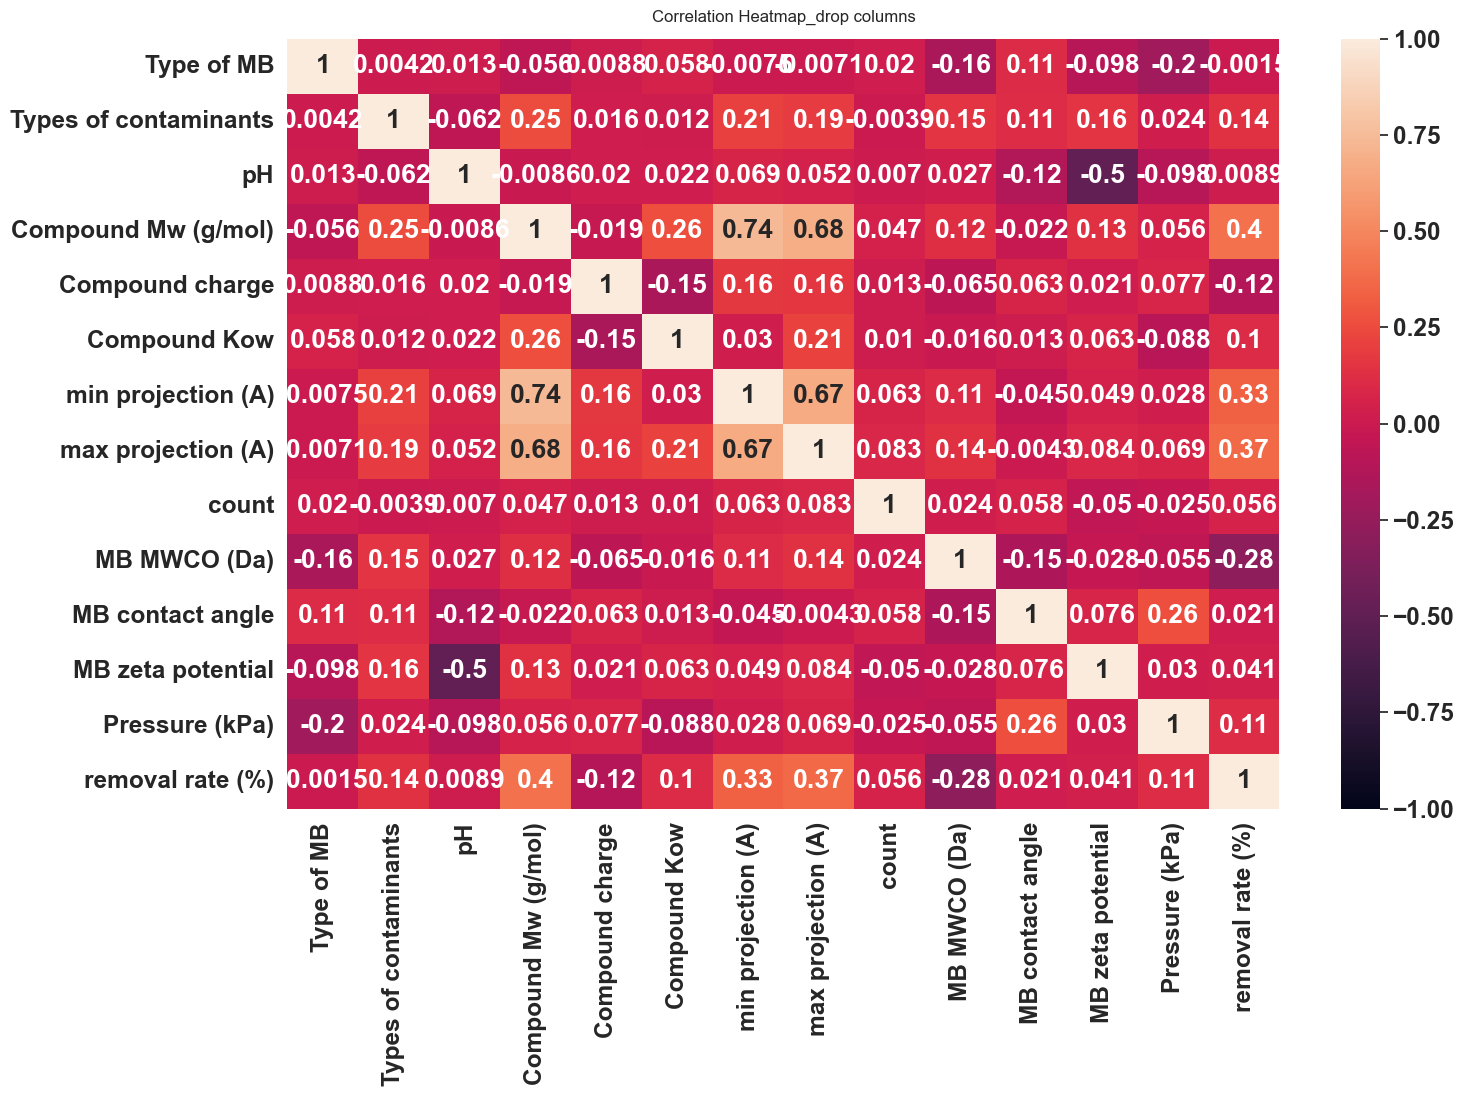

In [7]:
selected_columns = df_ori[['Type of MB', 'Types of contaminants', 'pH', 'Compound Mw (g/mol)', 'Compound charge', 'Compound Kow', 'min projection (A)', 'max projection (A)', 'count', 'MB MWCO (Da)', 'MB contact angle', 'MB zeta potential', 'Pressure (kPa)', 'removal rate (%)']]
df_2_copy = selected_columns.copy()

label_encoder_1 = LabelEncoder()
df_2_copy['Type of MB'] = label_encoder_1.fit_transform(df_2_copy['Type of MB'])
label_encoder_2 = LabelEncoder()
df_2_copy['Types of contaminants'] = label_encoder_1.fit_transform(df_2_copy['Types of contaminants'])

plt.figure(figsize=(16,10))
sns.set(font_scale=1.6)
heatmap = sns.heatmap(df_2_copy.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap_drop columns', fontdict={'fontsize':12}, pad=12);
plt.show()

In [8]:
y_data = df_ori['removal rate (%)']
x_data = df_ori.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [25]:
power_train = PowerTransformer(standardize=True)
power_val = PowerTransformer(standardize=True)
power_test = PowerTransformer(standardize=True)

y_train_trans = power_train.fit_transform(y_train.values.reshape(-1, 1))
y_val_trans = power_val.fit_transform(y_val.values.reshape(-1, 1))
y_test_trans = power_test.fit_transform(y_test.values.reshape(-1, 1))

In [26]:
le_mem_type0 = LabelEncoder()
le_mem_type1 = LabelEncoder()
le_mem_type2 = LabelEncoder()
x_train.iloc[:,0] = le_mem_type0.fit_transform(x_train.iloc[:,0])
x_val.iloc[:,0] = le_mem_type1.fit_transform(x_val.iloc[:,0])
x_test.iloc[:,0] = le_mem_type2.fit_transform(x_test.iloc[:,0])

le_con_type0 = LabelEncoder()
le_con_type1 = LabelEncoder()
le_con_type2 = LabelEncoder()
x_train.iloc[:,1] = le_mem_type0.fit_transform(x_train.iloc[:,1])
x_val.iloc[:,1] = le_mem_type1.fit_transform(x_val.iloc[:,1])
x_test.iloc[:,1] = le_mem_type2.fit_transform(x_test.iloc[:,1])

scaler_mem_type0 = preprocessing.MinMaxScaler()
scaler_con_type0 = preprocessing.MinMaxScaler()
scaler_pH0 = preprocessing.MinMaxScaler()
scaler_MW0 = preprocessing.MinMaxScaler()
scaler_char0 = preprocessing.MinMaxScaler()
scaler_Kow0 = preprocessing.MinMaxScaler()
scaler_min0 = preprocessing.MinMaxScaler()
scaler_max0 = preprocessing.MinMaxScaler()
scaler_cnt0 = preprocessing.MinMaxScaler()
scaler_MWCO0 = preprocessing.MinMaxScaler()
scaler_CA0 = preprocessing.MinMaxScaler()
scaler_zeta0 = preprocessing.MinMaxScaler()
scaler_total0 = preprocessing.MinMaxScaler()
scaler_kPa0 = preprocessing.MinMaxScaler()
scaler_time0 = preprocessing.MinMaxScaler()
scaler_conc0 = preprocessing.MinMaxScaler()
scaler_removal0 = preprocessing.MinMaxScaler()

scaler_mem_type1 = preprocessing.MinMaxScaler()
scaler_con_type1 = preprocessing.MinMaxScaler()
scaler_pH1 = preprocessing.MinMaxScaler()
scaler_MW1 = preprocessing.MinMaxScaler()
scaler_char1 = preprocessing.MinMaxScaler()
scaler_Kow1 = preprocessing.MinMaxScaler()
scaler_min1 = preprocessing.MinMaxScaler()
scaler_max1 = preprocessing.MinMaxScaler()
scaler_cnt1 = preprocessing.MinMaxScaler()
scaler_MWCO1 = preprocessing.MinMaxScaler()
scaler_CA1 = preprocessing.MinMaxScaler()
scaler_zeta1 = preprocessing.MinMaxScaler()
scaler_total1 = preprocessing.MinMaxScaler()
scaler_kPa1 = preprocessing.MinMaxScaler()
scaler_time1 = preprocessing.MinMaxScaler()
scaler_conc1 = preprocessing.MinMaxScaler()
scaler_removal1 = preprocessing.MinMaxScaler()

scaler_mem_type2 = preprocessing.MinMaxScaler()
scaler_con_type2 = preprocessing.MinMaxScaler()
scaler_pH2 = preprocessing.MinMaxScaler()
scaler_MW2 = preprocessing.MinMaxScaler()
scaler_char2 = preprocessing.MinMaxScaler()
scaler_Kow2 = preprocessing.MinMaxScaler()
scaler_min2 = preprocessing.MinMaxScaler()
scaler_max2 = preprocessing.MinMaxScaler()
scaler_cnt2 = preprocessing.MinMaxScaler()
scaler_MWCO2 = preprocessing.MinMaxScaler()
scaler_CA2 = preprocessing.MinMaxScaler()
scaler_zeta2 = preprocessing.MinMaxScaler()
scaler_total2 = preprocessing.MinMaxScaler()
scaler_kPa2 = preprocessing.MinMaxScaler()
scaler_time2 = preprocessing.MinMaxScaler()
scaler_conc2 = preprocessing.MinMaxScaler()
scaler_removal2 = preprocessing.MinMaxScaler()

In [27]:
temp_0 = scaler_mem_type0.fit_transform(x_train.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type0.fit_transform(x_train.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH0.fit_transform(x_train.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO0.fit_transform(x_train.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA0.fit_transform(x_train.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta0.fit_transform(x_train.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa0.fit_transform(x_train.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal0.fit_transform(y_train_trans)

temp_8 = scaler_MW0.fit_transform(x_train.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char0.fit_transform(x_train.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow0.fit_transform(x_train.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min0.fit_transform(x_train.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max0.fit_transform(x_train.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt0.fit_transform(x_train.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total0.fit_transform(x_train.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time0.fit_transform(x_train.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc0.fit_transform(x_train.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_train_scaled = pd.DataFrame()
y_train_scaled = pd.DataFrame()

x_train_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_train_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_train_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_train_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_train_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_train_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_train_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_train_scaled = temp_7.reshape(1,-1).tolist()[0]

x_train_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_train_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_train_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_train_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_train_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_train_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_train_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_train_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_train_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [30]:
temp_0 = scaler_mem_type1.fit_transform(x_val.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type1.fit_transform(x_val.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH1.fit_transform(x_val.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO1.fit_transform(x_val.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA1.fit_transform(x_val.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta1.fit_transform(x_val.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa1.fit_transform(x_val.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal1.fit_transform(y_val_trans)

temp_8 = scaler_MW1.fit_transform(x_val.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char1.fit_transform(x_val.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow1.fit_transform(x_val.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min1.fit_transform(x_val.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max1.fit_transform(x_val.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt1.fit_transform(x_val.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total1.fit_transform(x_val.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time1.fit_transform(x_val.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc1.fit_transform(x_val.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_val_scaled = pd.DataFrame()
y_val_scaled = pd.DataFrame()

x_val_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_val_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_val_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_val_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_val_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_val_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_val_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_val_scaled = temp_7.reshape(1,-1).tolist()[0]

x_val_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_val_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_val_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_val_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_val_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_val_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_val_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_val_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_val_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [33]:
temp_0 = scaler_mem_type2.fit_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))
temp_1 = scaler_con_type2.fit_transform(x_test.loc[:,'Types of contaminants'].values.reshape(-1,1))
temp_2 = scaler_pH2.fit_transform(x_test.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO2.fit_transform(x_test.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA2.fit_transform(x_test.loc[:,'MB contact angle'].values.reshape(-1,1))
temp_5 = scaler_zeta2.fit_transform(x_test.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa2.fit_transform(x_test.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_removal2.fit_transform(y_test_trans)

temp_8 = scaler_MW2.fit_transform(x_test.loc[:,'Compound Mw (g/mol)'].values.reshape(-1,1))
temp_9 = scaler_char2.fit_transform(x_test.loc[:,'Compound charge'].values.reshape(-1,1))
temp_10 = scaler_Kow2.fit_transform(x_test.loc[:,'Compound Kow'].values.reshape(-1,1))
temp_11 = scaler_min2.fit_transform(x_test.loc[:,'min projection (A)'].values.reshape(-1,1))
temp_12 = scaler_max2.fit_transform(x_test.loc[:,'max projection (A)'].values.reshape(-1,1))
temp_13 = scaler_cnt2.fit_transform(x_test.loc[:,'count'].values.reshape(-1,1))
temp_14 = scaler_total2.fit_transform(x_test.loc[:,'Total charge'].values.reshape(-1,1))
temp_15 = scaler_time2.fit_transform(x_test.loc[:,'Measurement time (min)'].values.reshape(-1,1))
temp_16 = scaler_conc2.fit_transform(x_test.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))

x_test_scaled = pd.DataFrame()
y_test_scaled = pd.DataFrame()

x_test_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
x_test_scaled['Types of contaminants'] = temp_1.reshape(1,-1).tolist()[0]
x_test_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_test_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_test_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
x_test_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_test_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
y_test_scaled = temp_7.reshape(1,-1).tolist()[0]

x_test_scaled['Compound Mw (g/mol)'] = temp_8.reshape(1,-1).tolist()[0]
x_test_scaled['Compound charge'] = temp_9.reshape(1,-1).tolist()[0]
x_test_scaled['Compound Kow'] = temp_10.reshape(1,-1).tolist()[0]
x_test_scaled['min projection (A)'] = temp_11.reshape(1,-1).tolist()[0]
x_test_scaled['max projection (A)'] = temp_12.reshape(1,-1).tolist()[0]
x_test_scaled['count'] = temp_13.reshape(1,-1).tolist()[0]
x_test_scaled['Total charge'] = temp_14.reshape(1,-1).tolist()[0]
x_test_scaled['Measurement time (min)'] = temp_15.reshape(1,-1).tolist()[0]
x_test_scaled['Initial concentration of compound (mg/L)'] = temp_16.reshape(1,-1).tolist()[0]

In [37]:
# Linear regression
reg_LR = LinearRegression()
reg_LR.fit(x_train_scaled, y_train_scaled)
#reg_LR.predict(x_test_scaled, y_test_scaled)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

# Build a model

In [24]:
# Rdkit 2048 (path length 7)
#df_2 = pd.read_csv('df_fin_2048.csv')
df_2 = pd.read_csv('df_fin_path_32768_3_fin.csv')
#df_2 = pd.read_csv('df_fin_path_1024_1_fin.csv')
#df_2 = pd.read_csv('df_fin_path_2048_7_short.csv')

In [4]:
# Morgan 2048 (radius 7)
#df_2 = pd.read_csv('df_fin_morgan_4096_1_fin.csv')
df_2 = pd.read_csv('df_fin_morgan_16384_3_fin.csv')

In [4]:
# PubChem 881
df_2 = pd.read_csv('df_fin_PubChem_new.csv')

In [55]:
# MACCS 166
#df_2 = pd.read_csv('df_fin_MACCS.csv')
df_2 = pd.read_csv('df_fin_MACCS_new.csv')

In [25]:
df_2.drop(labels=['Types of contaminants'], axis=1, inplace=True)

In [26]:
y_data = df_2['removal rate (%)']
x_data = df_2.copy()
x_data.drop(columns=['removal rate (%)'], inplace=True)

In [27]:
# stratified splits
mini = np.amin(y_data)
maxi = np.amax(y_data)
bins = np.linspace(start=mini, stop=maxi, num=10)
y_binned = np.digitize(y_data, bins, right=True)
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=6, stratify=y_binned)

# mini = np.amin(y_train)
# maxi = np.amax(y_train)
# bins = np.linspace(start=mini, stop=maxi, num=10)
# y_binned = np.digitize(y_train, bins, right=True)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=6, stratify=y_binned)

In [28]:
# normal splits
# x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=1)
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

In [29]:
# y_train_trans = y_train/100

# y_val_trans = y_val/100

# y_test_trans = y_test/100

In [30]:
y_train_trans = y_train/100
y_train_trans = -np.sqrt(1-y_train_trans)

# y_val_trans = y_val/100
# y_val_trans = -np.sqrt(1-y_val_trans)

y_test_trans = y_test/100
y_test_trans = -np.sqrt(1-y_test_trans)

(array([ 3.,  2.,  1.,  2.,  4.,  2.,  1.,  6.,  2.,  2.,  1.,  5.,  2.,
         1.,  3.,  1.,  2.,  4.,  0.,  0.,  2.,  3.,  0.,  3.,  1.,  6.,
         1.,  1.,  0.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  1.,  3.,  2.,
         0.,  2.,  0.,  2.,  2.,  4.,  3.,  5.,  2.,  5.,  2.,  2.,  4.,
         1.,  9.,  2.,  2.,  7.,  4.,  8.,  3.,  1.,  5.,  2.,  7.,  3.,
         3.,  5.,  5.,  7.,  5.,  9.,  3.,  3.,  8.,  8.,  7.,  5., 15.,
         6., 14.,  5.,  5.,  8.,  6.,  5.,  7.,  5.,  6.,  3.,  6., 10.,
         3.,  7.,  3.,  3.,  3.,  4.,  2.,  1., 19.]),
 array([-1.  , -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92,
        -0.91, -0.9 , -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83,
        -0.82, -0.81, -0.8 , -0.79, -0.78, -0.77, -0.76, -0.75, -0.74,
        -0.73, -0.72, -0.71, -0.7 , -0.69, -0.68, -0.67, -0.66, -0.65,
        -0.64, -0.63, -0.62, -0.61, -0.6 , -0.59, -0.58, -0.57, -0.56,
        -0.55, -0.54, -0.53, -0.52, -0.51, -0.5 , -0.49, -0.48, -0.47,
        

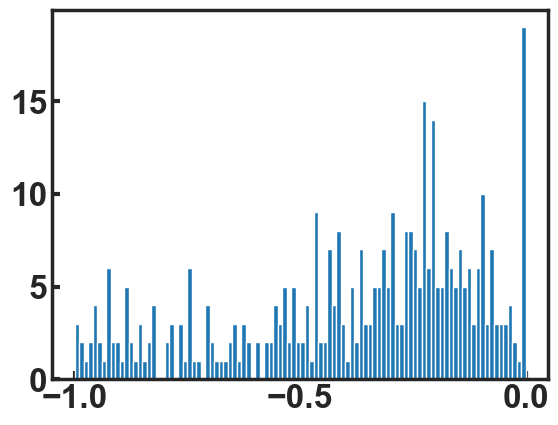

In [31]:
#scaler = preprocessing.MinMaxScaler()
#scaler.fit(b.values.reshape(-1,1))
#temp = scaler.transform(b.values.reshape(-1,1))
plt.hist(y_test_trans, bins=100)

In [32]:
print(y_train_trans.agg(['skew', 'kurtosis']).transpose())
#print(y_val_trans.agg(['skew', 'kurtosis']).transpose())
print(y_test_trans.agg(['skew', 'kurtosis']).transpose())

skew       -0.755673
kurtosis   -0.437802
Name: removal rate (%), dtype: float64
skew       -0.705561
kurtosis   -0.516505
Name: removal rate (%), dtype: float64


In [33]:
y_train_trans = y_train_trans.values.reshape(-1, 1)
#y_val_trans = y_val_trans.values.reshape(-1, 1)
y_test_trans = y_test_trans.values.reshape(-1, 1)

In [34]:
le_mem_type0 = LabelEncoder()
le_mem_type1 = LabelEncoder()
le_mem_type2 = LabelEncoder()
x_train.iloc[:,0] = le_mem_type0.fit_transform(x_train.iloc[:,0])
#x_val.iloc[:,0] = le_mem_type1.fit_transform(x_val.iloc[:,0])
x_test.iloc[:,0] = le_mem_type2.fit_transform(x_test.iloc[:,0])

scaler_mem_type0 = preprocessing.MinMaxScaler()
scaler_con_type0 = preprocessing.MinMaxScaler()
scaler_pH0 = preprocessing.MinMaxScaler()
scaler_MW0 = preprocessing.MinMaxScaler()
scaler_char0 = preprocessing.MinMaxScaler()
scaler_Kow0 = preprocessing.MinMaxScaler()
scaler_min0 = preprocessing.MinMaxScaler()
scaler_max0 = preprocessing.MinMaxScaler()
scaler_cnt0 = preprocessing.MinMaxScaler()
scaler_MWCO0 = preprocessing.MinMaxScaler()
scaler_CA0 = preprocessing.MinMaxScaler()
scaler_zeta0 = preprocessing.MinMaxScaler()
scaler_total0 = preprocessing.MinMaxScaler()
scaler_kPa0 = preprocessing.MinMaxScaler()
scaler_time0 = preprocessing.MinMaxScaler()
scaler_conc0 = preprocessing.MinMaxScaler()
scaler_removal0 = preprocessing.MinMaxScaler()

scaler_mem_type1 = preprocessing.MinMaxScaler()
scaler_con_type1 = preprocessing.MinMaxScaler()
scaler_pH1 = preprocessing.MinMaxScaler()
scaler_MW1 = preprocessing.MinMaxScaler()
scaler_char1 = preprocessing.MinMaxScaler()
scaler_Kow1 = preprocessing.MinMaxScaler()
scaler_min1 = preprocessing.MinMaxScaler()
scaler_max1 = preprocessing.MinMaxScaler()
scaler_cnt1 = preprocessing.MinMaxScaler()
scaler_MWCO1 = preprocessing.MinMaxScaler()
scaler_CA1 = preprocessing.MinMaxScaler()
scaler_zeta1 = preprocessing.MinMaxScaler()
scaler_total1 = preprocessing.MinMaxScaler()
scaler_kPa1 = preprocessing.MinMaxScaler()
scaler_time1 = preprocessing.MinMaxScaler()
scaler_conc1 = preprocessing.MinMaxScaler()
scaler_removal1 = preprocessing.MinMaxScaler()

scaler_mem_type2 = preprocessing.MinMaxScaler()
scaler_con_type2 = preprocessing.MinMaxScaler()
scaler_pH2 = preprocessing.MinMaxScaler()
scaler_MW2 = preprocessing.MinMaxScaler()
scaler_char2 = preprocessing.MinMaxScaler()
scaler_Kow2 = preprocessing.MinMaxScaler()
scaler_min2 = preprocessing.MinMaxScaler()
scaler_max2 = preprocessing.MinMaxScaler()
scaler_cnt2 = preprocessing.MinMaxScaler()
scaler_MWCO2 = preprocessing.MinMaxScaler()
scaler_CA2 = preprocessing.MinMaxScaler()
scaler_zeta2 = preprocessing.MinMaxScaler()
scaler_total2 = preprocessing.MinMaxScaler()
scaler_kPa2 = preprocessing.MinMaxScaler()
scaler_time2 = preprocessing.MinMaxScaler()
scaler_conc2 = preprocessing.MinMaxScaler()
scaler_removal2 = preprocessing.MinMaxScaler()

In [35]:
temp_0 = scaler_mem_type0.fit_transform(x_train.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
temp_2 = scaler_pH0.fit_transform(x_train.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO0.fit_transform(x_train.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA0.fit_transform(x_train.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa0.fit_transform(x_train.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_conc0.fit_transform(x_train.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_8 = scaler_removal0.fit_transform(y_train_trans)

x_train_scaled = pd.DataFrame()
y_train_scaled = pd.DataFrame()

x_train_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_train_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_train_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_train_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_train_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
x_train_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_train_scaled = temp_8.reshape(1,-1).tolist()[0]

In [36]:
# temp_0 = scaler_mem_type1.fit_transform(x_val.loc[:,'Type of MB'].values.reshape(-1,1))
# # scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# # temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_2 = scaler_pH1.fit_transform(x_val.loc[:,'pH'].values.reshape(-1,1))
# temp_3 = scaler_MWCO1.fit_transform(x_val.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
# temp_4 = scaler_CA1.fit_transform(x_val.loc[:,'MB contact angle'].values.reshape(-1,1))
# # scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# # temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_6 = scaler_kPa1.fit_transform(x_val.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
# temp_7 = scaler_conc1.fit_transform(x_val.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
# temp_8 = scaler_removal1.fit_transform(y_val_trans)

# x_val_scaled = pd.DataFrame()
# y_val_scaled = pd.DataFrame()

# x_val_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# # x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
# x_val_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
# x_val_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
# x_val_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
# #x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
# x_val_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
# x_val_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
# #y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
# y_val_scaled = temp_8.reshape(1,-1).tolist()[0]

In [37]:
temp_0 = scaler_mem_type2.fit_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))
# scaler_PCA_size.fit(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
# temp_1 = scaler_PCA_size.transform(x_data.loc[:,'PCA_size'].values.reshape(-1,1))
temp_2 = scaler_pH2.fit_transform(x_test.loc[:,'pH'].values.reshape(-1,1))
temp_3 = scaler_MWCO2.fit_transform(x_test.loc[:,'MB MWCO (Da)'].values.reshape(-1,1))
temp_4 = scaler_CA2.fit_transform(x_test.loc[:,'MB contact angle'].values.reshape(-1,1))
# scaler_zeta.fit(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
# temp_5 = scaler_zeta.transform(x_data.loc[:,'MB zeta potential'].values.reshape(-1,1))
temp_6 = scaler_kPa2.fit_transform(x_test.loc[:,'Pressure (kPa)'].values.reshape(-1,1))
temp_7 = scaler_conc2.fit_transform(x_test.loc[:,'Initial concentration of compound (mg/L)'].values.reshape(-1,1))
temp_8 = scaler_removal2.fit_transform(y_test_trans)

x_test_scaled = pd.DataFrame()
y_test_scaled = pd.DataFrame()

x_test_scaled['Type of MB'] = temp_0.reshape(1,-1).tolist()[0]
# x_data_scaled['PCA_size'] = temp_1.reshape(1,-1).tolist()[0]
x_test_scaled['pH'] = temp_2.reshape(1,-1).tolist()[0]
x_test_scaled['MB MWCO (Da)'] = temp_3.reshape(1,-1).tolist()[0]
x_test_scaled['MB contact angle'] = temp_4.reshape(1,-1).tolist()[0]
#x_data_scaled['MB zeta potential'] = temp_5.reshape(1,-1).tolist()[0]
x_test_scaled['Pressure (kPa)'] = temp_6.reshape(1,-1).tolist()[0]
x_test_scaled['Initial concentration of compound (mg/L)'] = temp_7.reshape(1,-1).tolist()[0]
#y_data_scaled = temp_8.reshape(1,-1).tolist()[0]
y_test_scaled = temp_8.reshape(1,-1).tolist()[0]

In [38]:
x_train.reset_index(drop=True, inplace=True)
#x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

In [39]:
x_train_scaled = pd.concat([x_train_scaled, x_train.iloc[:, 7:]], axis=1)
#x_val_scaled = pd.concat([x_val_scaled, x_val.iloc[:, 7:]], axis=1)
x_test_scaled = pd.concat([x_test_scaled, x_test.iloc[:, 7:]], axis=1)

(array([ 3.,  2.,  1.,  2.,  4.,  2.,  1.,  6.,  2.,  2.,  1.,  5.,  2.,
         1.,  3.,  1.,  2.,  4.,  0.,  1.,  1.,  3.,  0.,  3.,  1.,  6.,
         1.,  1.,  0.,  4.,  2.,  1.,  1.,  1.,  2.,  3.,  1.,  3.,  2.,
         0.,  2.,  0.,  2.,  2.,  4.,  3.,  5.,  2.,  5.,  2.,  2.,  4.,
         1.,  9.,  2.,  2.,  7.,  4.,  8.,  3.,  1.,  5.,  2.,  7.,  3.,
         3.,  5.,  5.,  7.,  5.,  9.,  3.,  3.,  8.,  8.,  7.,  5., 15.,
         6., 14.,  5.,  5.,  8.,  6.,  5.,  7.,  5.,  6.,  3.,  6., 10.,
         3.,  7.,  3.,  3.,  3.,  4.,  2.,  1., 19.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.

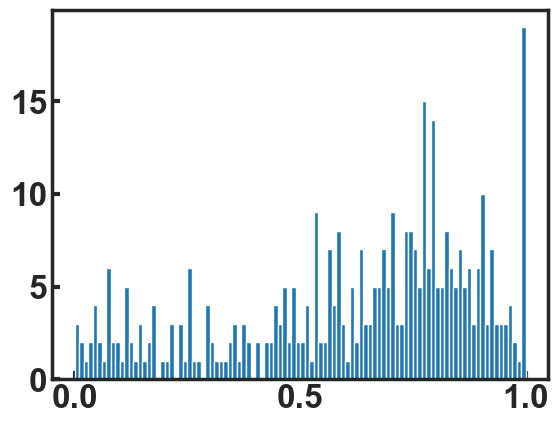

In [40]:
plt.hist(y_test_scaled, bins=100)

In [41]:
reg_LR = SGDRegressor()
param_grid_LR = {'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty': ['l2', 'l1', 'elasticnet', None],
              'alpha': np.linspace(0.1, 1e-8, 50),
              'epsilon': np.linspace(0.1, 1e-8, 50),
              'l1_ratio': [1, 0.7, 0.5, 0.2, 0],
              'eta0': np.linspace(0.1, 1e-8, 50)
              }
random_cv_LR = RandomizedSearchCV(reg_LR, param_grid_LR, cv=5, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_LR = random_cv_LR.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [42]:
print(search_LR.best_params_)
print(search_LR.score(x_train_scaled, y_train_scaled))

{'penalty': None, 'loss': 'squared_error', 'l1_ratio': 1, 'eta0': 0.03877551632653061, 'epsilon': 0.08979591938775511, 'alpha': 0.01632653897959184}
0.5392268363616765


0.03292722530408222
0.04031235164312951
0.5392268363616765
0.45650386120498443


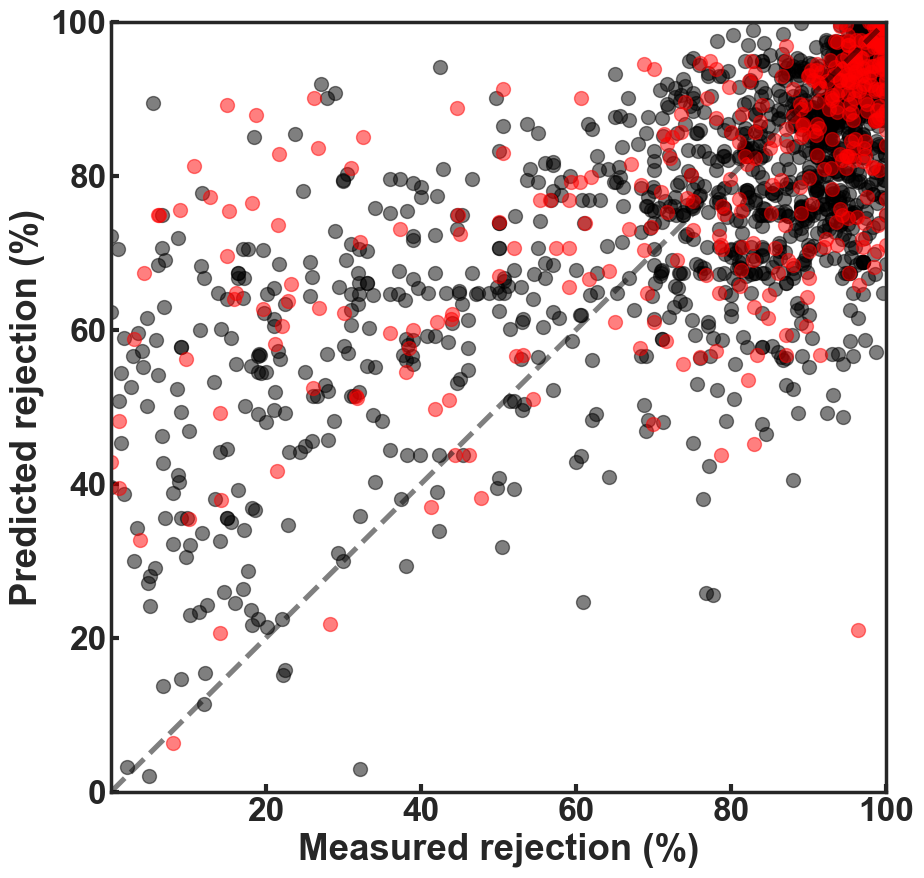

In [43]:
pred_train_LR = search_LR.predict(x_train_scaled)
pred_test_LR = search_LR.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_LR))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_LR))
print(r2_score(y_train_scaled, pred_train_LR))
print(r2_score(y_test_scaled, pred_test_LR))

pred_train_LR_inverse = scaler_removal0.inverse_transform(pred_train_LR.reshape(1,-1))
pred_test_LR_inverse = scaler_removal2.inverse_transform(pred_test_LR.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_LR_real_scale = (1-(-pred_train_LR_inverse)**2)*100
pred_test_LR_real_scale = (1-(-pred_test_LR_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_LR_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_LR_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [44]:
reg_SVM = SVR()
param_grid_SVM = {'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
                  'C' : np.linspace(1e-2, 20, 20),
                  'degree' : np.arange(0, 20, 2),
                  'coef0' : [10, 1, 0.1, 0.01, 1e-3, 1e-4, 1e-5],
                  'gamma' : ('auto','scale')
                 }
random_cv_SVM = RandomizedSearchCV(reg_SVM, param_grid_SVM, cv=5, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_SVM = random_cv_SVM.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [45]:
print(search_SVM.best_params_)
print(search_SVM.score(x_train_scaled, y_train_scaled))

{'kernel': 'rbf', 'gamma': 'scale', 'degree': 14, 'coef0': 1e-05, 'C': 3.1663157894736838}
0.6800884206362097


0.022861141842376566
0.03629554100839994
0.6800884206362097
0.5106590017825585


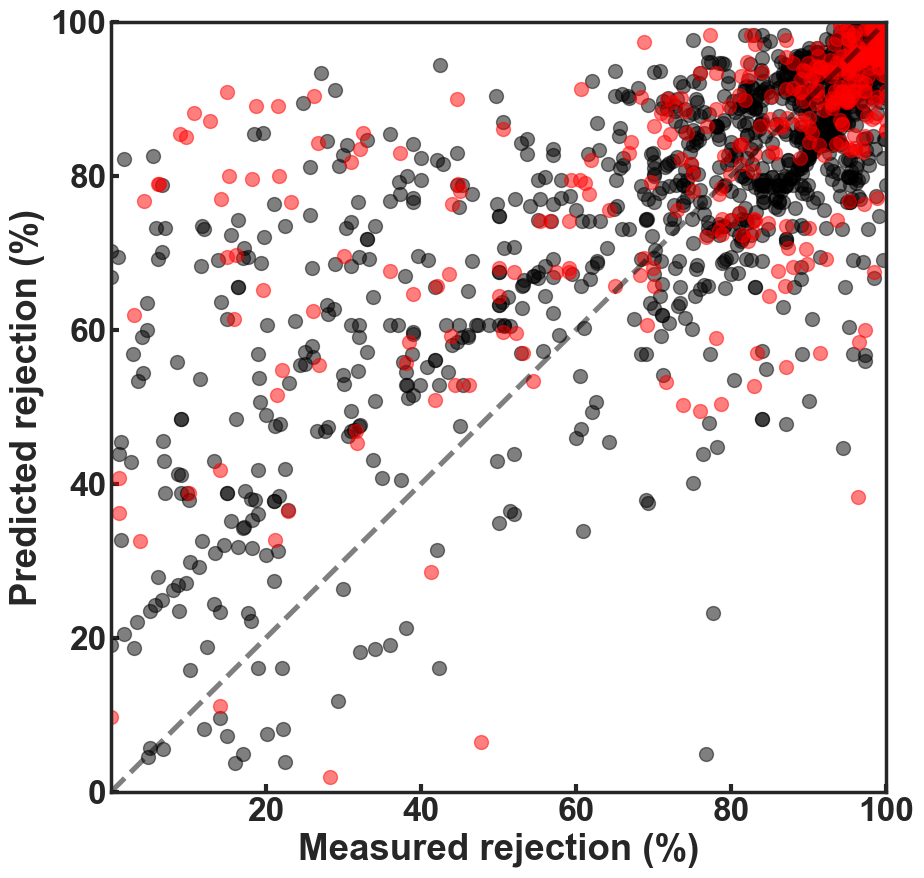

In [46]:
pred_train_SVM = search_SVM.predict(x_train_scaled)
pred_test_SVM = search_SVM.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_SVM))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_SVM))
print(r2_score(y_train_scaled, pred_train_SVM))
print(r2_score(y_test_scaled, pred_test_SVM))

pred_train_SVM_inverse = scaler_removal0.inverse_transform(pred_train_SVM.reshape(1,-1))
pred_test_SVM_inverse = scaler_removal2.inverse_transform(pred_test_SVM.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_SVM_real_scale = (1-(-pred_train_SVM_inverse)**2)*100
pred_test_SVM_real_scale = (1-(-pred_test_SVM_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_SVM_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_SVM_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [47]:
reg_xgb = XGBRegressor()
param_grid_xgb = {'max_depth':range(1,20,2),
                  'min_child_weight':range(1,10,2),
                  'eta':[1e-5,1e-4,1e-3,1e-2,1e-1,1],
                  'subsample':np.linspace(0,1,9),
                  'colsample_bytree':np.linspace(0,1,9),
                  'n_estimators':[10, 50, 100, 200, 400, 800, 1200, 1600, 2000]
                 }
random_cv_xgb = RandomizedSearchCV(reg_xgb, param_grid_xgb, cv=5, n_iter=20, random_state=0, verbose=1, n_jobs=-1)
search_xgb = random_cv_xgb.fit(x_train_scaled, y_train_scaled)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [48]:
print(search_xgb.best_params_)
print(search_xgb.score(x_train_scaled, y_train_scaled))

{'subsample': 0.625, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 19, 'eta': 0.01, 'colsample_bytree': 0.875}
0.8902383115200398


0.007843659595533648
0.019310491603187967
0.8902383115200398
0.7396535504185864


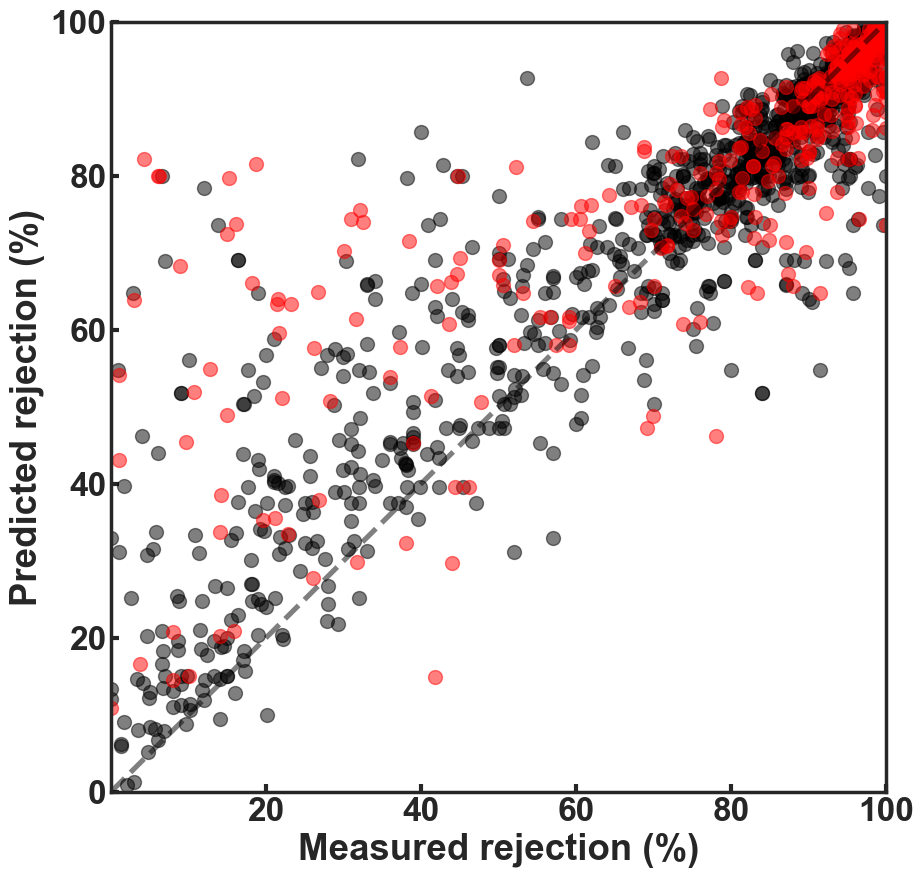

In [49]:
pred_train_xgb = search_xgb.predict(x_train_scaled)
pred_test_xgb = search_xgb.predict(x_test_scaled)
print(mean_squared_error(y_true=y_train_scaled, y_pred=pred_train_xgb))
print(mean_squared_error(y_true=y_test_scaled, y_pred=pred_test_xgb))
print(r2_score(y_train_scaled, pred_train_xgb))
print(r2_score(y_test_scaled, pred_test_xgb))

pred_train_xgb_inverse = scaler_removal0.inverse_transform(pred_train_xgb.reshape(1,-1))
pred_test_xgb_inverse = scaler_removal2.inverse_transform(pred_test_xgb.reshape(1,-1))
y_train_scaled_inverse = scaler_removal0.inverse_transform(np.reshape(y_train_scaled, (1,-1)))
y_test_scaled_inverse = scaler_removal2.inverse_transform(np.reshape(y_test_scaled, (1,-1)))

#sqrt
pred_train_xgb_real_scale = (1-(-pred_train_xgb_inverse)**2)*100
pred_test_xgb_real_scale = (1-(-pred_test_xgb_inverse)**2)*100
y_train_real_scale = (1-(-y_train_scaled_inverse)**2)*100
y_test_real_scale = (1-(-y_test_scaled_inverse)**2)*100

fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_xgb_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_xgb_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
#fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

In [48]:
# pbounds = {
#     'learning_rate': (0.01, 1.0),
#     'n_estimators': (100, 1000),
#     'max_depth': (3,10),
#     'subsample': (1.0, 1.0),  # Change for big datasets
#     'colsample': (1.0, 1.0),  # Change for datasets with lots of features
#     'gamma': (0, 5)}

pbounds = {'max_depth':(2, 30),
            'learning_rate':(0.0001, 0.1),
            'n_estimators':(1000, 5000),
            'gamma':(0, 100),
            'min_child_weight':(0, 5),
            'subsample':(0.01, 1),
            'colsample_bytree':(0.01, 1),
            'reg_alpha':(0, 100),
            'reg_lambda':(0, 100)}

def xgboost_hyper_param(learning_rate, n_estimators, max_depth, subsample, colsample_bytree, gamma, min_child_weight, reg_alpha, reg_lambda):
    
#     max_depth = int(max_depth)
#     n_estimators = int(n_estimators)

    clf = XGBRegressor(max_depth=int(max_depth),
                                learning_rate=learning_rate,
                                n_estimators=int(n_estimators),
                                gamma=gamma,
                                min_child_weight=min_child_weight,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                reg_alpha=reg_alpha, 
                                reg_lambda=reg_lambda
                                )
    clf_2 = clf.fit(x_train_scaled, y_train_scaled)
    pred = clf_2.predict(x_train_scaled)
    
    return mean_squared_error(y_train_scaled, pred)
    #return clf_2.score(x_train_scaled, y_train_scaled)
    #return np.mean(cross_val_score(clf, x_train_scaled, y_train_scaled, cv=5)) # , scoring='neg_mean_absolute_error'

optimizer = BayesianOptimization(f=xgboost_hyper_param, pbounds=pbounds, random_state=1)

In [49]:
optimizer.maximize(init_points=5, n_iter=400, acq='ei', xi=0.01)
print(optimizer.max)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | n_esti... | reg_alpha | reg_la... | subsample |
-------------------------------------------------------------------------------------------------------------------------------------


C:\Users\leesa\AppData\Local\Temp\ipykernel_13420\1484024885.py:1: DeprecationWarning: 
Passing acquisition function parameters or gaussian process parameters to maximize
is no longer supported, and will cause an error in future releases. Instead,
please use the "set_gp_params" method to set the gp params, and pass an instance
 of bayes_opt.util.UtilityFunction using the acquisition_function argument

  optimizer.maximize(init_points=5, n_iter=400, acq='ei', xi=0.01)


| 1         | -0.1683   | 0.4229    | 72.03     | 0.0001114 | 10.47     | 0.7338    | 1.369e+03 | 18.63     | 34.56     | 0.4028    |
| 2         | -0.05817  | 0.5434    | 41.92     | 0.06855   | 7.725     | 4.391     | 1.11e+03  | 67.05     | 41.73     | 0.5631    |
| 3         | -0.2082   | 0.149     | 19.81     | 0.08009   | 29.11     | 1.567     | 3.769e+03 | 87.64     | 89.46     | 0.09419   |
| 4         | -0.09209  | 0.04866   | 16.98     | 0.08783   | 4.754     | 2.106     | 4.832e+03 | 53.32     | 69.19     | 0.3224    |
| 5         | -0.2054   | 0.6896    | 83.46     | 0.001927  | 23.0      | 4.944     | 3.993e+03 | 28.04     | 78.93     | 0.1122    |
| 6         | -3.43e-05 | 0.5105    | 11.92     | 0.03104   | 22.38     | 3.41      | 1.005e+03 | 0.08069   | 8.8       | 0.3238    |
| 7         | -0.2082   | 0.2247    | 8.474     | 0.04443   | 7.163     | 4.803     | 2.589e+03 | 34.11     | 11.13     | 0.02965   |
| 8         | -0.0372   | 0.2344    | 20.84     | 0.04486   | 

| 38        | -0.1796   | 0.02812   | 46.16     | 0.0001    | 26.52     | 2.805     | 1.01e+03  | 40.76     | 85.69     | 1.0       |
| 39        | -2.886e-0 | 0.2971    | 94.92     | 0.02905   | 11.37     | 4.102     | 1.059e+03 | 0.5938    | 49.71     | 0.905     |
| 40        | -0.000857 | 0.8718    | 40.52     | 0.005272  | 5.141     | 2.707     | 1.063e+03 | 6.075     | 71.25     | 0.3798    |
| 41        | -9.172e-0 | 0.2483    | 76.08     | 0.07359   | 4.941     | 4.813     | 1.07e+03  | 0.4587    | 97.2      | 0.2405    |
| 42        | -4.409e-0 | 0.625     | 4.425     | 0.09481   | 4.761     | 0.614     | 1.032e+03 | 5.148     | 66.67     | 0.3015    |
| 43        | -0.000715 | 0.2718    | 76.7      | 0.03484   | 20.92     | 0.5385    | 1.059e+03 | 15.53     | 69.23     | 0.5548    |
| 44        | -3.028e-0 | 0.1592    | 94.56     | 0.04783   | 8.674     | 0.2382    | 1.044e+03 | 2.253     | 97.04     | 0.6145    |
| 45        | -0.1971   | 1.0       | 64.42     | 0.0001    | 

| 75        | -0.000432 | 0.3003    | 9.079     | 0.06092   | 18.34     | 1.291     | 1.063e+03 | 15.84     | 70.17     | 0.6375    |
| 76        | 0.01541   | 0.3439    | 6.286     | 0.09583   | 17.25     | 0.6915    | 1.047e+03 | 16.16     | 84.4      | 0.8495    |
| 77        | -0.02658  | 0.5745    | 3.281     | 0.06054   | 2.922     | 3.742     | 1.051e+03 | 25.44     | 75.2      | 0.2498    |
| 78        | 0.1713    | 0.1479    | 0.7458    | 0.02882   | 8.513     | 2.391     | 1.071e+03 | 22.28     | 54.71     | 0.7023    |
| 79        | -3.572e-0 | 0.8417    | 5.571     | 0.03802   | 23.61     | 0.4768    | 1.07e+03  | 1.102     | 62.67     | 0.2349    |


KeyboardInterrupt: 

In [25]:
print(optimizer.max)

{'target': -0.03424613352888729, 'params': {'colsample_bytree': 0.10321347257848498, 'gamma': 0.0, 'learning_rate': 0.016684694711099277, 'max_depth': 17.928221540113782, 'min_child_weight': 3.321673754602196, 'n_estimators': 2951.262863653291, 'reg_alpha': 8.262641712350865, 'reg_lambda': 2.0875747818680717, 'subsample': 1.0}}


In [47]:
temp_xgb_2.score(x_train_scaled, y_train_scaled)

0.9458961231747123

In [55]:
mean_squared_error(y_test_scaled, val1)

0.018082468502281995

In [46]:
temp_xgb = XGBRegressor() #XGBRegressor(colsample_bytree= 0.10321347257848498, gamma= 0.0, learning_rate= 0.016684694711099277, max_depth= 18, min_child_weight= 3.321673754602196, n_estimators= 2951, reg_alpha= 8.262641712350865, reg_lambda= 2.0875747818680717, subsample= 1.0)
temp_xgb_2 = temp_xgb.fit(x_train_scaled, y_train_scaled)
val0 = temp_xgb_2.predict(x_train_scaled)
val1 = temp_xgb_2.predict(x_test_scaled)
print(r2_score(y_train_scaled, val0))
print(r2_score(y_test_scaled, val1))

0.9564005711455368
0.7272225828835995


In [35]:
x_train_scaled

,Type of MB,pH,MB MWCO (Da),MB contact angle,Pressure (kPa),Initial concentration of compound (mg/L),1,2,3,4,...,158,159,160,161,162,163,164,165,166,167
0,0.342105,0.545455,0.341772,0.126154,0.079755,9.640003e-06,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
1,0.473684,0.545455,0.594937,0.606154,0.233129,4.999642e-03,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0.368421,0.659091,0.316456,0.440000,0.079755,6.400002e-07,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
3,0.736842,0.545455,0.088608,0.624615,0.401840,1.000000e+00,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
4,0.631579,0.659091,0.088608,0.498462,0.073620,4.964002e-05,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,0.500000,0.545455,0.594937,0.244615,0.074540,2.140001e-06,0,0,0,0,...,1,0,1,1,0,1,1,1,1,0
1215,0.526316,0.545455,0.696203,0.396923,0.171779,9.964004e-05,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
1216,0.605263,0.886364,0.620253,0.870769,0.171779,3.162501e-05,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
1217,0.368421,0.545455,0.316456,0.190769,0.079755,9.640003e-06,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0


In [41]:
# https://stackoverflow.com/questions/38079853/how-can-i-implement-incremental-training-for-xgboost
import timeit
start = timeit.default_timer()

params = {"objective":"reg:squarederror"}#, 
         #'max_depth':20, 'learning_rate':0.05, 'n_estimators':2000, 'gamma':1, 'min_child_weight':1, 'subsample':0.9, 
         #'colsample_bytree':0.9, 'reg_alpha':1, 'reg_lambda':1} #, 'tree_method':'gpu_hist', 'booster': 'dart', 'one_drop':1, 
            # 'eval_metric': 'rmse'}#,'colsample_bytree': 0.3,'learning_rate': 0.1, 
         # 'max_depth': 5, 'alpha': 10}#, 'process_type': 'update', 'updater': 'refresh', 'refresh_leaf': True}
        # reg:pseudohubererror, reg:squaredlogerror, reg:squarederror, reg:gamma, reg:logistic, reg:tweedie
        
err_list = []
err_list_test = []
res = {}
#model = None

xgtrain = xgb.DMatrix(x_train_scaled, y_train_scaled, feature_names=x_train_scaled.columns)
model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=3000)

for i in range(100):
    params.update({'process_type': 'update', 'updater' : 'refresh', 'refresh_leaf' : False})
    
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train_scaled, y_train_scaled, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train_scaled):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            np.random.seed(j)
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half, feature_names=x_train_half.columns)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy, feature_names=x_test_dummy.columns)
    
    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=3000, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_train_half, y_pred=pred_train)
    test_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, train_err, test_err)
    err_list.append(train_err)
    err_list_test.append(test_err)

stop = timeit.default_timer()
print('Time: ', stop - start)

[15:04:12] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
0 0.07483123954640168 0.06921300574398749
[15:04:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence of updaters will produce undefined behavior. For common uses, we recommend using `tree_method` parameter instead.
1 0.0725260623199004 0.07151440399142894
[15:04:18] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/gbm/gbtree.cc:82: DANGER AHEAD: You have manually specified `updater` parameter. The `tree_method` parameter will be ignored. Incorrect sequence

KeyboardInterrupt: 

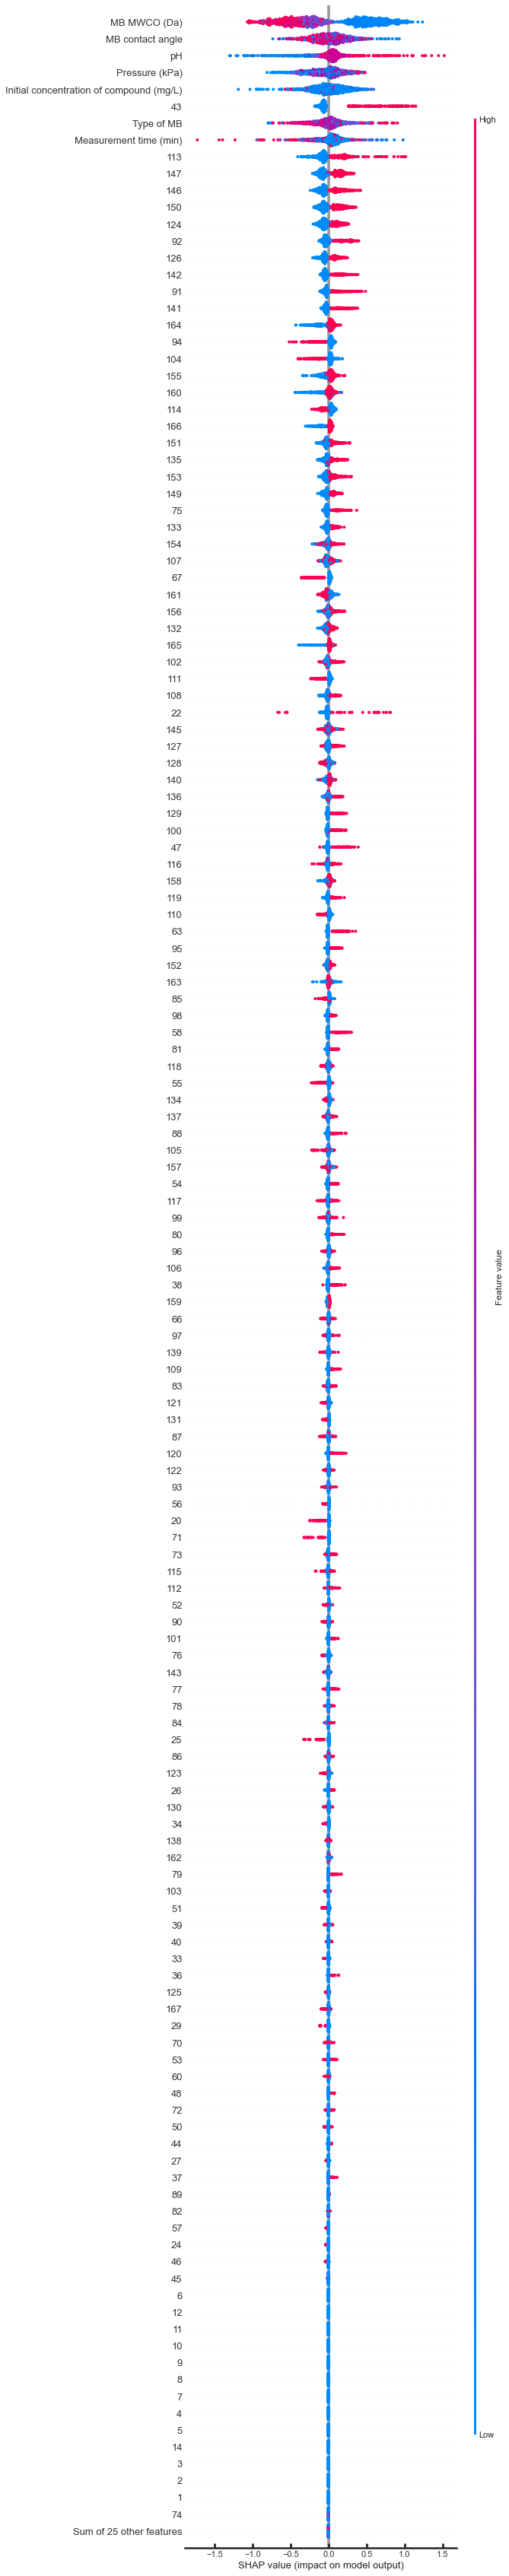

In [22]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=150, order=shap_values.abs.mean(0), show=False)
#plt.savefig('sqrt_shap_path_3.pdf', format='pdf', dpi=1000, bbox_inches='tight')

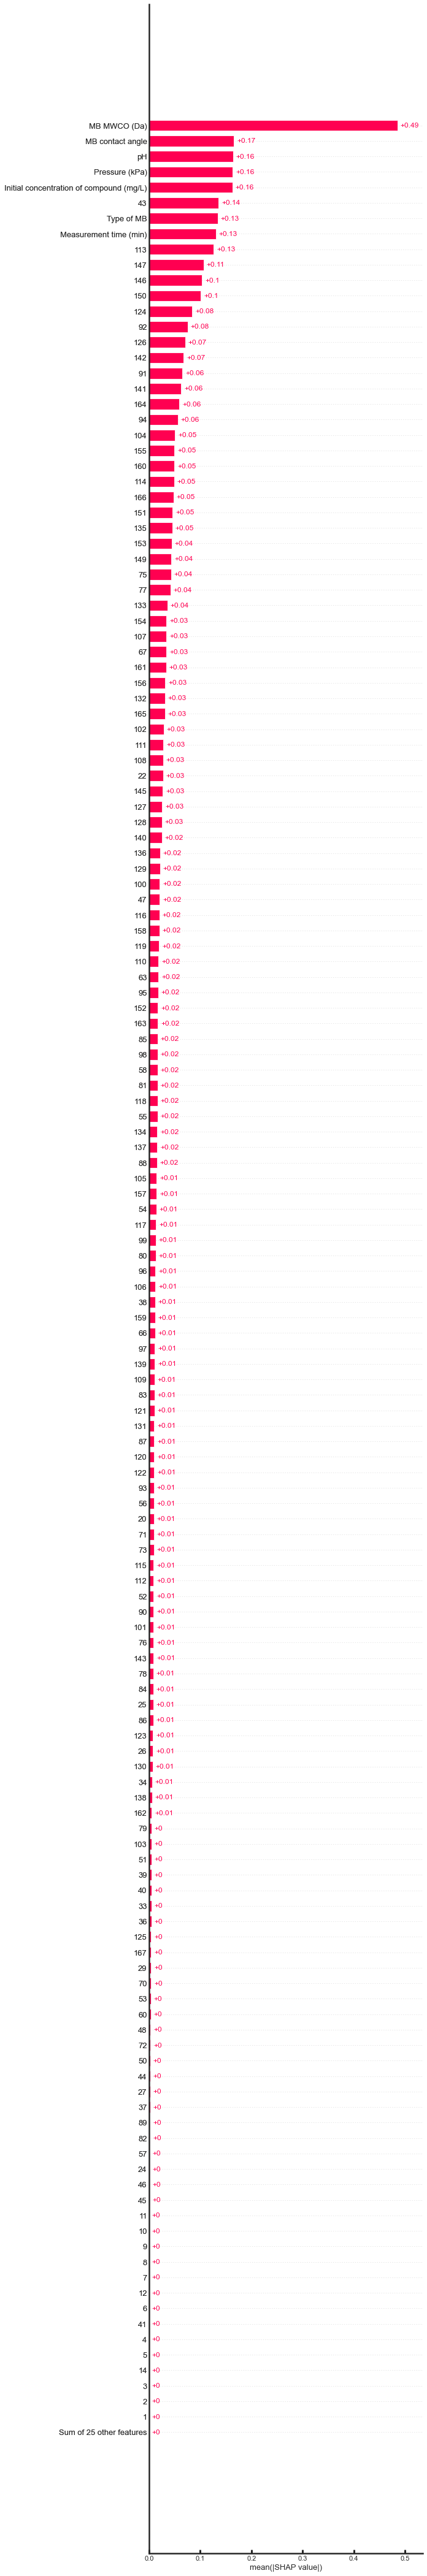

In [21]:
shap.plots.bar(shap_values, max_display=150)

In [118]:
shap_output = model.predict(xgtrain, pred_contribs=True)
shap_values = shap_output[:, :-1]
expected_value = shap_output[0, -1]
shap.summary_plot(shap_values)

In [21]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

0.001085678195760016
0.010172912154138777


0.0026162589523399354
0.011930629089777331


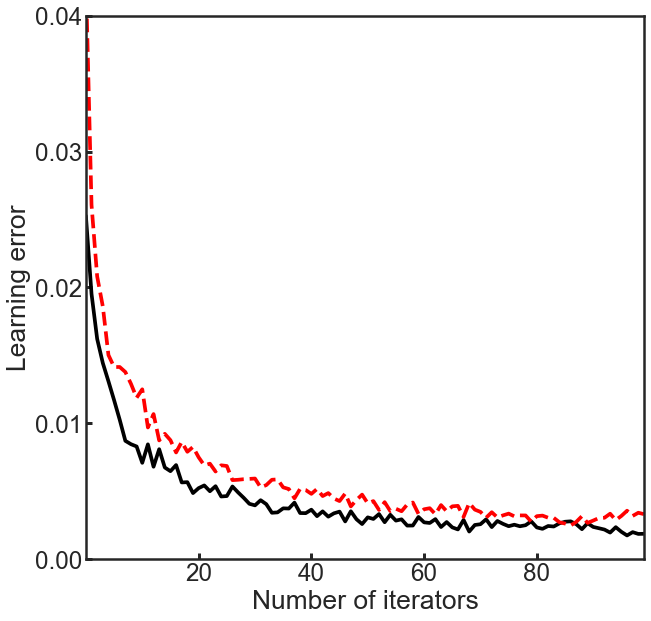

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


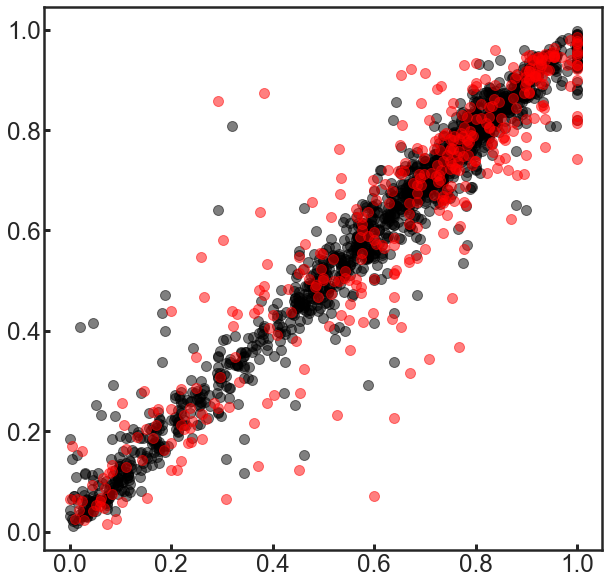

In [46]:
#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
# pred_train = model.predict(xgb.DMatrix(x_train, y_train))
# pred_test = model.predict(xgb.DMatrix(x_test, y_test))
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)
print(mean_squared_error(y_true=y_train, y_pred=pred_train))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))

fig = plt.figure(figsize=(10,10))
plt.plot(err_list, 'k-')
plt.plot(err_list_test, 'r--')
plt.xlabel('Number of iterators')
plt.ylabel('Learning error')
plt.xlim(0.01,99)
plt.ylim(0,0.04)
#plt.xticks(np.arange(0,99,20))
plt.yticks(np.arange(0,0.0401,0.01))
plt.show()
fig.savefig('sqrt_fig_0_path_3.pdf', bbox_i6nches='tight', transparent=True)

plt.figure(figsize=(10,10))
plt.scatter(y_train, pred_train, c='k', alpha=0.5, s=100)
plt.scatter(y_test, pred_test, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

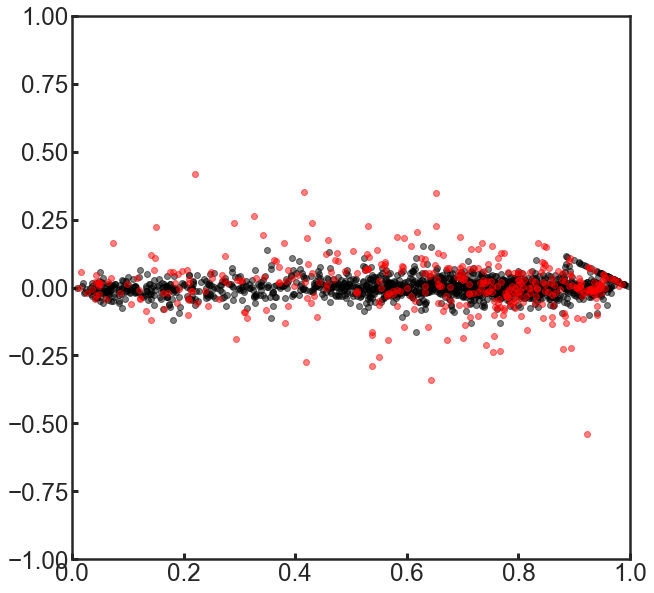

0.0010120640302584394
0.009279640857029002


In [91]:
plt.figure(figsize=(10,10))
plt.plot(pred_train, y_train-pred_train, 'ko', alpha=0.5)
plt.plot(pred_test, y_test-pred_test, 'ro', alpha=0.5)
plt.xlim(0,1)
plt.ylim(-1,1)
plt.show()

print(np.sum((y_train-pred_train)**2)/1524)
print(np.sum((y_test-pred_test)**2)/382)

In [47]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.751241229294651
0.8376002516581201


In [48]:
pred_train_inverse = scaler_removal.inverse_transform(pred_train.reshape(1,-1))
pred_test_inverse = scaler_removal.inverse_transform(pred_test.reshape(1,-1))
y_train_inverse = scaler_removal.inverse_transform(np.reshape(y_train, (1,-1)))
y_test_inverse = scaler_removal.inverse_transform(np.reshape(y_test, (1,-1)))

In [40]:
# #log
# pred_train_real_scale = (1-np.exp(-pred_train_inverse))*100
# pred_test_real_scale = (1-np.exp(-pred_test_inverse))*100
# y_train_real_scale = (1-np.exp(-y_train_inverse))*100
# y_test_real_scale = (1-np.exp(-y_test_inverse))*100

In [49]:
#sqrt
pred_train_real_scale = (1-(-pred_train_inverse)**2)*100
pred_test_real_scale = (1-(-pred_test_inverse)**2)*100
y_train_real_scale = (1-(-y_train_inverse)**2)*100
y_test_real_scale = (1-(-y_test_inverse)**2)*100

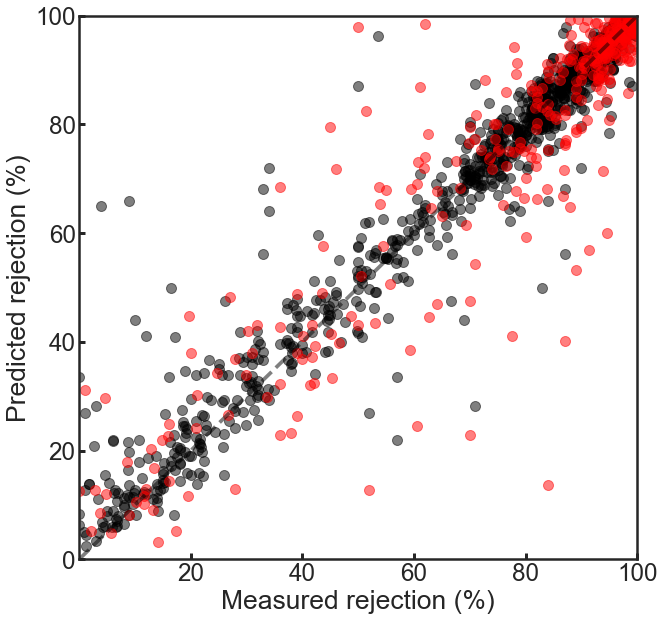

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [50]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.arange(0, 100.01, 0.1), 'k--', alpha=0.5)
plt.scatter(y_train_real_scale, pred_train_real_scale, c='k', alpha=0.5, s=100)
plt.scatter(y_test_real_scale, pred_test_real_scale, c='r', alpha=0.5, s=100)
plt.xlim(0.01,100)
plt.ylim(0,100)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()
fig.savefig("sqrt_fig_1_path_3.pdf", bbox_i6nches='tight', transparent=True)

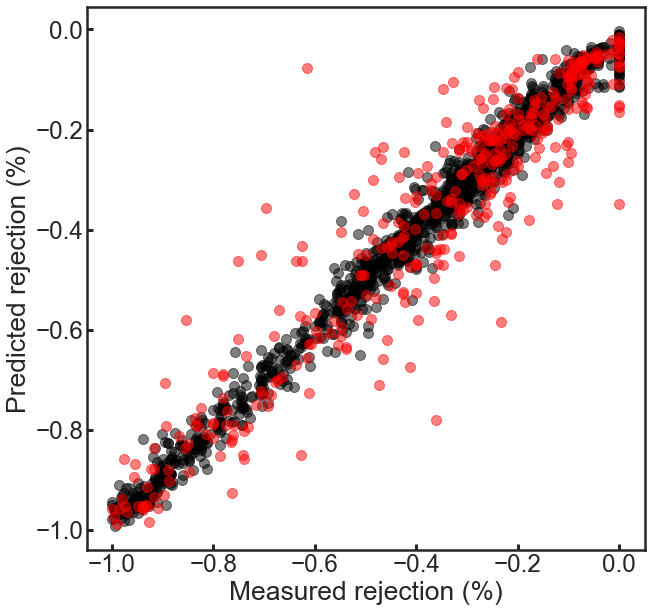

In [108]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y_train_inverse, pred_train_inverse, c='k', alpha=0.5, s=100)
plt.scatter(y_test_inverse, pred_test_inverse, c='r', alpha=0.5, s=100)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.xlabel('Measured rejection (%)')
plt.ylabel('Predicted rejection (%)')
plt.show()

In [51]:
#tau, p_value = stats.kendalltau(y_test_real_scale, pred_test_real_scale)
print(stats.spearmanr(y_train_real_scale[0], pred_train_real_scale[0]))
print(stats.spearmanr(y_test_real_scale[0], pred_test_real_scale[0]))
print(r2_score(y_train_real_scale[0], pred_train_real_scale[0]))
print(r2_score(y_test_real_scale[0], pred_test_real_scale[0]))
print(mean_squared_error(y_train_real_scale, pred_train_real_scale, squared=False))
print(mean_squared_error(y_test_real_scale, pred_test_real_scale, squared=False))

SpearmanrResult(correlation=0.9789347093971613, pvalue=0.0)
SpearmanrResult(correlation=0.9075248026298885, pvalue=3.07466901749497e-145)
0.9573213977126478
0.8374637629327765
2.6002030463749337
6.026294380234923


In [57]:
tau, p_value = stats.kendalltau(y_test_inverse, pred_test_inverse)
print(stats.spearmanr(y_test_inverse[0], pred_test_inverse[0]))
print(tau)
print(r2_score(y_test_inverse[0], pred_test_inverse[0]))
print(mean_squared_error(y_test_inverse[0], pred_test_inverse[0], squared=False))

SpearmanrResult(correlation=0.9167640429791172, pvalue=1.5718797451721199e-153)
0.7639477705359597
0.8642933525965555
0.09984804292351211


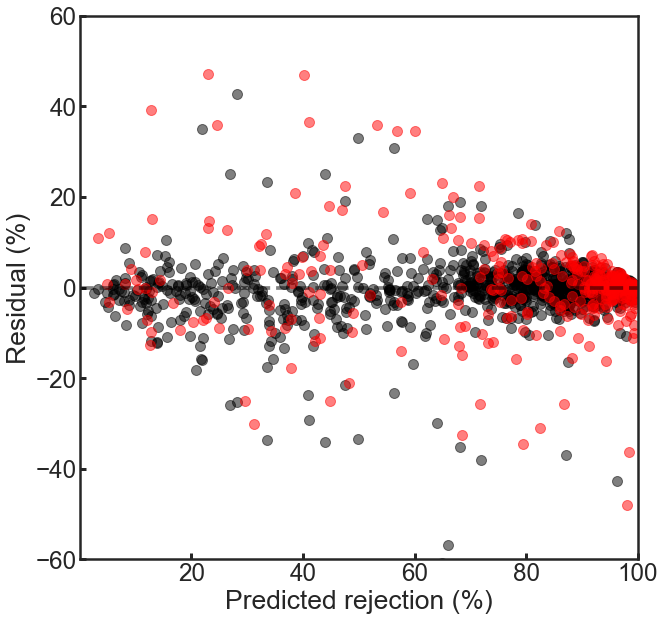

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


In [52]:
fig = plt.figure(figsize=(10,10))
plt.plot(np.arange(0, 100.01, 0.1), np.zeros(1001), 'k--', alpha=0.5)
plt.scatter(pred_train_real_scale, y_train_real_scale-pred_train_real_scale, c='k', s=100, alpha=0.5)
plt.scatter(pred_test_real_scale, y_test_real_scale-pred_test_real_scale, c='r', s=100, alpha=0.5)
plt.xlabel('Predicted rejection (%)')
plt.ylabel('Residual (%)')
plt.xlim(0.01,100)
plt.ylim(-60,60)
plt.show()
fig.savefig("sqrt_residual_path_3.pdf", bbox_i6nches='tight', transparent=True)

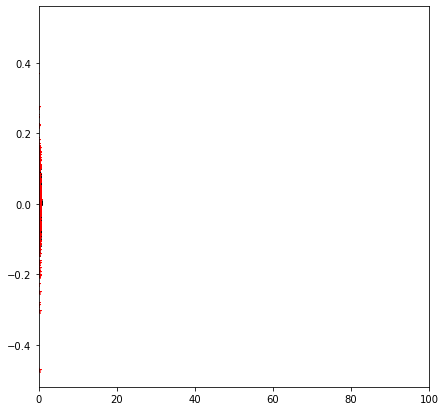

In [59]:
plt.figure(figsize=(7,7))
plt.plot(pred_train_inverse, y_train_inverse-pred_train_inverse, 'k^')
plt.plot(pred_test_inverse, y_test_inverse-pred_test_inverse, 'r*')
plt.xlim(0,100)
#plt.ylim(-1,1)
plt.show()

In [134]:
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

model_CA_1 = XGBRegressor(objective = 'reg:squarederror')
#model_CA_1 = XGBClassifier()
evaluation = [(x_train, y_train), (x_test, y_test)]
model_CA_1.fit(x_train, y_train, eval_set = evaluation, eval_metric = "rmse", early_stopping_rounds=10, verbose=3)
# model_CA_1.fit(x_train, y_train)
pred_train = model_CA_1.predict(x_train)#, training=False)
pred_test = model_CA_1.predict(x_test)#, training=False)

print(r2_score(y_train, pred_train))
print(r2_score(y_test, pred_test))

# print(accuracy_score(y_test, pred_CA_1))
# print(precision_score(y_test, pred_CA_1, average='macro'))
# print(recall_score(y_test, pred_CA_1, average='macro'))
# print(classification_report(y_test, pred_CA_1))


# # Cross validation
# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_CA_1, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?


plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.show()

results = model_CA_1.evals_result()
plt.figure(figsize=(7,7))
plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k--') #train
plt.plot(results['validation_1']['rmse'], 'r-') #test
plt.show()

NotFittedError: need to call fit or load_model beforehand

In [16]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)

SpearmanrResult(correlation=0.8598106953003057, pvalue=5.647392399783467e-113)
0.693094346217264


In [29]:
explainer = shap.Explainer(model_CA_1)
shap_values = explainer(x_train)
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0))
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0))
#shap.plots.bar(shap_values.abs.mean(0), max_display=20)
#shap.plots.beeswarm(shap_values.abs, color="shap_red", max_display=20)

NameError: name 'model_CA_1' is not defined

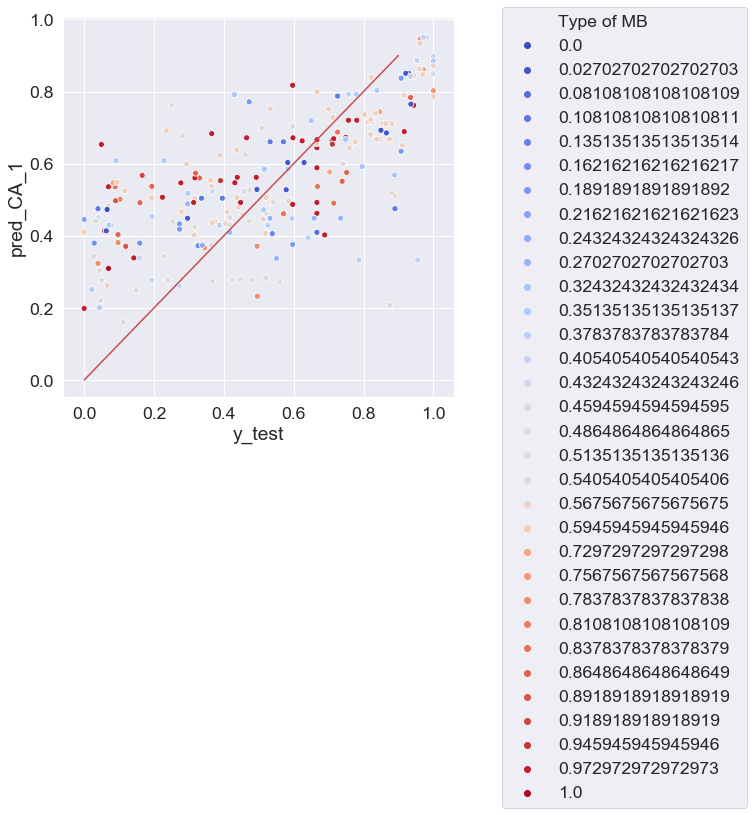

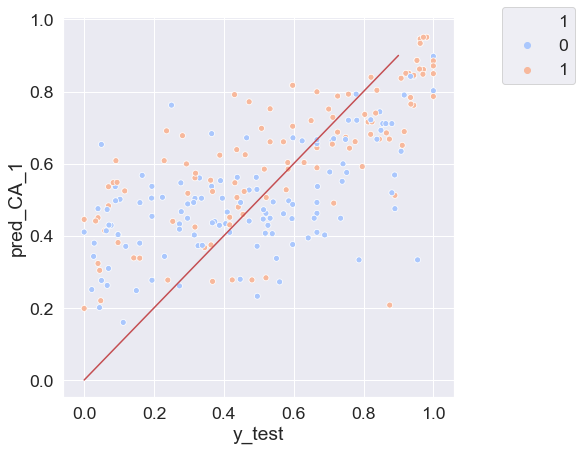

In [99]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['Type of MB'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

plt.figure(figsize=(7,7))
sns.scatterplot(df_test_temp['y_test'], df_test_temp['pred_CA_1'], hue=df_test_temp['1'], legend='full', palette='coolwarm')
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r-')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

In [70]:
scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

C:\Users\leesa\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:273: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: y contains previously unseen labels: [19. 21. 27. 29. 31.]

In [27]:
scaler.inverse_transform(data_scaled)

scaler_mem_type = preprocessing.MinMaxScaler()
scaler_con_type = preprocessing.MinMaxScaler()
scaler_pH = preprocessing.MinMaxScaler()
scaler_MWCO = preprocessing.MinMaxScaler()
scaler_CA = preprocessing.MinMaxScaler()
scaler_zeta = preprocessing.MinMaxScaler()
scaler_kPa = preprocessing.MinMaxScaler()
scaler_removal = preprocessing.MinMaxScaler()

temp_0 = scaler_mem_type.inverse_transform(x_test.loc[:,'Type of MB'].values.reshape(-1,1))

NameError: name 'scaler' is not defined

In [43]:
# XGBRegressor with Bayesian hyperparameter tuning
#x_train, x_test, y_train, y_test = train_test_split(x_data_scaled, y_data_scaled, test_size=0.2, random_state=3)

# # Original
# space={'max_depth': hp.choice('max_depth', np.arange(3, 50, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 20, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 10, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.1, 10, 0.1),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 200, 2000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.3, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 1, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 1, 0.1),
#       }

# # Short 1
# space={'max_depth': hp.choice('max_depth', np.arange(3, 10, 1)),
#         'gamma': hp.choice('gamma', np.arange(0, 5, 1)),
#         'reg_alpha' : hp.quniform('reg_alpha', 0.1, 1, 0.1),
#         'reg_lambda' : hp.quniform('reg_lambda', 0.01, 1, 0.01),
#         'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 0.5, 0.1),
#         'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
#         'n_estimators': hp.quniform('n_estimators', 100, 1000, 100),
#         'learning_rate': hp.quniform('learning_rate', 0, 0.1, 0.002),
#         'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
#         'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.5, 0.1),
#         'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.5, 0.1),
#       }

# Short 2
space={'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }

kf = KFold(n_splits=6, shuffle=True, random_state=3)

def objective(space, cv=kf, X=x_train_scaled, y=y_train_scaled):
    clf = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(space['n_estimators']), max_depth = int(space['max_depth']), gamma = space['gamma'],
                       reg_alpha = int(space['reg_alpha']), reg_lambda = int(space['reg_lambda']), min_child_weight=space['min_child_weight'],
                       colsample_bytree=space['colsample_bytree'], learning_rate=space['learning_rate'], subsample=space['subsample'],
                       colsample_bylevel=space['colsample_bylevel'], colsample_bynode=space['colsample_bynode'], random_state = 3)
    
    score = -cross_val_score(clf, X, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return score

trials = Trials()
best_hyperparams = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials, rstate=np.random.default_rng(3))
print(best_hyperparams)

TypeError: fmin() takes from 2 to 3 positional arguments but 0 were given

In [45]:
from hyperopt import fmin, tpe, hp
best = fmin(fn=lambda x: x ** 2,
    space=hp.uniform('x', -10, 10),
    algo=tpe.suggest,
    max_evals=100)
print (best)

100%|██████████████████████████████████████████| 100/100 [00:00<00:00, 284.12trial/s, best loss: 0.0020289781259712858]
{'x': -0.04504417971249211}


In [47]:
space={'objective': 'reg:squarederror', 'tree_method':'gpu_hist', 'booster':'dart', 'one_drop':1, # reg:logistic
        'max_depth': hp.choice('max_depth', np.arange(3, 20, 1)),
        'gamma': hp.choice('gamma', np.arange(0, 10, 1)),
        'reg_alpha' : hp.quniform('reg_alpha', 0.1, 5, 0.1),
        'reg_lambda' : hp.quniform('reg_lambda', 0.1, 5, 0.1),
        'colsample_bytree' : hp.quniform('colsample_bytree', 0.1, 1, 0.1),
        'min_child_weight' : hp.choice('min_child_weight', np.arange(0, 10, 1)),
        'learning_rate': hp.quniform('learning_rate', 0.002, 0.1, 0.002),
        'subsample': hp.quniform('subsample', 0.2, 1, 0.1),
        'colsample_bylevel': hp.quniform('colsample_bylevel', 0.2, 0.7, 0.1),
        'colsample_bynode': hp.quniform('colsample_bynode', 0.2, 0.7, 0.1),
      }
# 'n_estimators': hp.quniform('n_estimators', 100, 1500, 100),

def objective(space):
    model = None
    for i in range(100):
        x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train_scaled, y_train_scaled, test_size=0.5, random_state=i)

        for j in range(len(y_train_half)):
            if y_train_half[j]==np.amax(y_train):
                y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
        
        xgtrain = xgb.DMatrix(x_train_half, y_train_half)
        xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

        model = xgb.train(params=space, dtrain=xgtrain, num_boost_round=10, xgb_model=model)
        pred_train = model.predict(xgtrain)
        pred_test = model.predict(xgtest)
        train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    
    pred_test = model.predict(xgb.DMatrix(x_test_scaled, y_test_scaled))
    err = mean_squared_error(y_true=y_test_scaled, y_pred=pred_test)

    print ("SCORE:", err)
    return {'loss': err, 'status': STATUS_OK }

trials = Trials()

#best_hyperparams = fmin(fn = objective, space = space, algo = tpe.suggest, max_evals = 30, trials = trials, rstate=np.random.default_rng(3))
best_hyperparams = fmin(objective, space=space, algo=tpe.suggest, max_evals=100, trials = trials, rstate=np.random.default_rng(3))

SCORE:                                                                                                                 
0.06714306299103769                                                                                                    
SCORE:                                                                                                                 
0.07417236532629949                                                                                                    
SCORE:                                                                                                                 
0.07418294378234862                                                                                                    
SCORE:                                                                                                                 
0.07104950801393069                                                                                                    
SCORE:                                  

SCORE:                                                                                                                 
0.02481987036846582                                                                                                    
SCORE:                                                                                                                 
0.023012528238920246                                                                                                   
SCORE:                                                                                                                 
0.03089409959126911                                                                                                    
SCORE:                                                                                                                 
0.06690524278131553                                                                                                    
SCORE:                                  

In [48]:
best_hyperparams

{'colsample_bylevel': 0.30000000000000004,
 'colsample_bynode': 0.4,
 'colsample_bytree': 1.0,
 'gamma': 0,
 'learning_rate': 0.088,
 'max_depth': 3,
 'min_child_weight': 4,
 'reg_alpha': 0.2,
 'reg_lambda': 1.3,
 'subsample': 1.0}

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_1024_1_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_short.txt', data, fmt='%s')

In [46]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_2_new.txt', data, fmt='%s')

In [36]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_short.txt', data, fmt='%s')

In [35]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_mem_class.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_2048_7_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_2_new.txt', data, fmt='%s')

In [ ]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_8192_4_new.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_path_32768_3_fin_b2.txt', data, fmt='%s')

In [47]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048.txt', data, fmt='%s')

In [79]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_rdkit_2048_short_2.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6.txt', data, fmt='%s')

In [58]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_short.txt', data, fmt='%s')

In [22]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_6_new.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_7_short.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_short.txt', data, fmt='%s')

In [18]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_1_new.txt', data, fmt='%s')

In [65]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_2048_2_new.txt', data, fmt='%s')

In [68]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_fin.txt', data, fmt='%s')

In [91]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_16384_3_fin_b2.txt', data, fmt='%s')

In [15]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881.txt', data, fmt='%s')

In [14]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_short.txt', data, fmt='%s')

In [154]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_pubchem_881_fin_b2.txt', data, fmt='%s')

In [43]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166.txt', data, fmt='%s')

In [21]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_short.txt', data, fmt='%s')

In [131]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_maccs_166_fin_b2.txt', data, fmt='%s')

In [26]:
data = list(best_hyperparams.items())
np.savetxt('best_hyperparams_morgan_4096_1_sqrt.txt', data, fmt='%s')

In [15]:
best_hyperparams = np.loadtxt("best_hyperparams_pubchem_881_short.txt", dtype=str)
best_hyperparams = dict(best_hyperparams)
for k, v in best_hyperparams.items():
    best_hyperparams[k] = float(v)

In [50]:
# XGBRegressor with Bayesian best parameters
model_B_best = XGBRegressor(objective = 'reg:squarederror', n_estimators = 1000, max_depth = int(best_hyperparams['max_depth']), 
                             gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
                             colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
                             subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
                             colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3, eval_metric = "rmse")

evaluation = [(x_train_scaled, y_train_scaled), (x_test_scaled, y_test_scaled)]
model_B_best.fit(x_train_scaled, y_train_scaled, eval_set = evaluation, verbose=3)#, early_stopping_rounds=10)
y_pred_train_best = model_B_best.predict(x_train_scaled)
y_pred_test_best = model_B_best.predict(x_test_scaled)
print(r2_score(y_train_scaled, y_pred_train_best))
print(r2_score(y_test_scaled, y_pred_test_best))
results = model_B_best.evals_result()


# # Cross validation
# model_B_best_cv = XGBRegressor(objective = 'reg:squarederror', n_estimators = int(best_hyperparams['n_estimators']), max_depth = int(best_hyperparams['max_depth']), 
#                              gamma = best_hyperparams['gamma'], reg_alpha = int(best_hyperparams['reg_alpha']), reg_lambda = int(best_hyperparams['reg_lambda']), min_child_weight=best_hyperparams['min_child_weight'],
#                              colsample_bytree=best_hyperparams['colsample_bytree'], learning_rate=best_hyperparams['learning_rate'], 
#                              subsample=best_hyperparams['subsample'], colsample_bylevel=best_hyperparams['colsample_bylevel'], 
#                              colsample_bynode=best_hyperparams['colsample_bynode'], random_state = 3)

# n_repeats = 6
# for i in range(n_repeats):
#     cv = RepeatedKFold(n_splits = 6, n_repeats = 1, random_state = i) # n_splits = 3 or 6?
#     cv_predictions = cross_val_predict(model_B_best_cv, x_data_scaled, y_data_scaled, cv=cv, n_jobs=-1)
    
#     if i == 0:
#         old = cv_predictions
#     else:
#         old = (np.array(old) + np.array(cv_predictions))/2

# print("R2 is ", r2_score(y_data_scaled, old))
# # how to add plot_importance with a CV model?

[0]	validation_0-rmse:0.28713	validation_1-rmse:0.29050
[3]	validation_0-rmse:0.26466	validation_1-rmse:0.26910
[6]	validation_0-rmse:0.24874	validation_1-rmse:0.25536
[9]	validation_0-rmse:0.23785	validation_1-rmse:0.24542
[12]	validation_0-rmse:0.22992	validation_1-rmse:0.23839
[15]	validation_0-rmse:0.22269	validation_1-rmse:0.23271
[18]	validation_0-rmse:0.21788	validation_1-rmse:0.22899
[21]	validation_0-rmse:0.21014	validation_1-rmse:0.22221
[24]	validation_0-rmse:0.20286	validation_1-rmse:0.21573
[27]	validation_0-rmse:0.19972	validation_1-rmse:0.21333
[30]	validation_0-rmse:0.19559	validation_1-rmse:0.20971
[33]	validation_0-rmse:0.19147	validation_1-rmse:0.20656
[36]	validation_0-rmse:0.18865	validation_1-rmse:0.20472
[39]	validation_0-rmse:0.18563	validation_1-rmse:0.20258
[42]	validation_0-rmse:0.18292	validation_1-rmse:0.20053
[45]	validation_0-rmse:0.18085	validation_1-rmse:0.19937
[48]	validation_0-rmse:0.17905	validation_1-rmse:0.19765
[51]	validation_0-rmse:0.17713	vali

[849]	validation_0-rmse:0.09379	validation_1-rmse:0.14244
[852]	validation_0-rmse:0.09373	validation_1-rmse:0.14239
[855]	validation_0-rmse:0.09364	validation_1-rmse:0.14234
[858]	validation_0-rmse:0.09351	validation_1-rmse:0.14223
[861]	validation_0-rmse:0.09344	validation_1-rmse:0.14227
[864]	validation_0-rmse:0.09328	validation_1-rmse:0.14231
[867]	validation_0-rmse:0.09322	validation_1-rmse:0.14227
[870]	validation_0-rmse:0.09316	validation_1-rmse:0.14223
[873]	validation_0-rmse:0.09301	validation_1-rmse:0.14217
[876]	validation_0-rmse:0.09297	validation_1-rmse:0.14215
[879]	validation_0-rmse:0.09284	validation_1-rmse:0.14212
[882]	validation_0-rmse:0.09279	validation_1-rmse:0.14203
[885]	validation_0-rmse:0.09267	validation_1-rmse:0.14197
[888]	validation_0-rmse:0.09259	validation_1-rmse:0.14194
[891]	validation_0-rmse:0.09251	validation_1-rmse:0.14195
[894]	validation_0-rmse:0.09243	validation_1-rmse:0.14193
[897]	validation_0-rmse:0.09240	validation_1-rmse:0.14192
[900]	validati

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


0 0.07909072582215554


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


1 0.06942003252158459


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


2 0.06197004259482292


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


3 0.05584927047812061


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


4 0.05364238488207519


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


5 0.05196716817483707


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


6 0.04909461548439746


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


7 0.04656342174867482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


8 0.04416402077232772


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


9 0.0408126102864982


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


10 0.04068193673344507


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


11 0.03912917538543679


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


12 0.041342234870180454


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


13 0.03824508014412136


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


14 0.03570654387537558


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


15 0.03693861832301049


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


16 0.03614018292427658


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


17 0.03511179270734234


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


18 0.03502446249159632


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


19 0.03314135543603559


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


20 0.03468345355210196


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


21 0.03277797192415655


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


22 0.03292485657027293


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


23 0.03122325186214785


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


24 0.03133046258823156


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


25 0.0321741830147403


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


26 0.0304784363611974


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


27 0.03110680667644285


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


28 0.029335456950091467


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


29 0.029241074569905816


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


30 0.030419826560207048


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


31 0.0289584318259517


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


32 0.029583834462786965


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


33 0.026673984772819542


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


34 0.02787036917863119


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


35 0.02916900672433983


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


36 0.02881765445347561


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


37 0.02887889951291818


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


38 0.027231164485973354


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


39 0.029863415944145193


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


40 0.026220359677092697


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


41 0.02827276892571639


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


42 0.02626559426944456


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


43 0.026752581212957278


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


44 0.029747697322867667


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


45 0.027267267178639386


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


46 0.02734327110698516


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


47 0.02396235533266683


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


48 0.0265986260503544


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


49 0.027233813514639396


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


50 0.025738371051851113


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


51 0.024549239872023815


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


52 0.026367579493002155


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


53 0.026416635004977325


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


54 0.02562090973137543


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


55 0.026497960174232005


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


56 0.026062354308846312


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


57 0.026235267880405755


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


58 0.024013411819092615


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


59 0.023972916930745828


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


60 0.02463368723490087


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


61 0.02618814042637427


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


62 0.024759004031920617


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


63 0.024177108787615635


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


64 0.023708245215794566


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


65 0.025476700544212482


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


66 0.024998165959791964


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


67 0.022630715571054148


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


68 0.023203819286006618


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


69 0.02587523012586036


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


70 0.023698113086757705


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


71 0.024660723522509177


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


72 0.02354452761199006


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


73 0.02395301330032377


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


74 0.024277601600808583


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


75 0.02301429106755219


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


76 0.02519037380191064


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


77 0.023146764218877992


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


78 0.022592496228910353


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


79 0.022108782329191765


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


80 0.02377080660777819


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


81 0.023081477436021684


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


82 0.024229366103353803


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


83 0.02235302003286453


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


84 0.02345889952396978


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


85 0.023427287605369246


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


86 0.022702390034202703


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


87 0.022695289701774028


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


88 0.023135673265520372


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


89 0.023477918350995896


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


90 0.022825040730039797


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


91 0.022980110473438908


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


92 0.023066157572348037


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


93 0.023911572565836817


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


94 0.021363786527115344


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


95 0.02217292967207237


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


96 0.022196748075556796


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


97 0.023098833993425476


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


98 0.022053383324729548


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


99 0.021506508671965775
0.024054683872899236


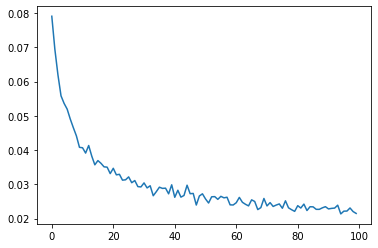

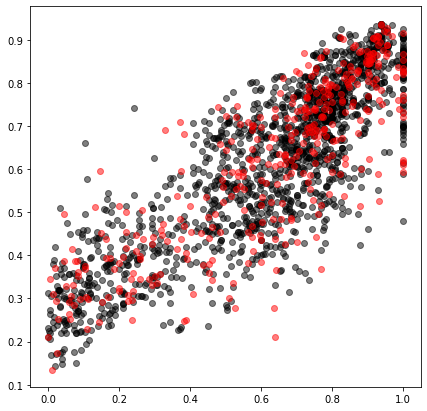

In [23]:
params = {"objective":"reg:logistic", 'tree_method':'gpu_hist',
         'max_depth' : int(best_hyperparams['max_depth']), 
         'gamma' : best_hyperparams['gamma'],
         'reg_alpha' : int(best_hyperparams['reg_alpha']), 
         'reg_lambda' : int(best_hyperparams['reg_lambda']), 
          'min_child_weight' : best_hyperparams['min_child_weight'],
          'colsample_bytree' : best_hyperparams['colsample_bytree'], 
          'learning_rate' : best_hyperparams['learning_rate'], 
          'subsample' : best_hyperparams['subsample'], 
          'colsample_bylevel' : best_hyperparams['colsample_bylevel'], 
          'colsample_bynode' : best_hyperparams['colsample_bynode'], 
          'random_state' : 3}

err_list = []
res = {}
model = None

for i in range(100):
    x_train_half, x_test_dummy, y_train_half, y_test_dummy = train_test_split(x_train, y_train, test_size=0.5, random_state=i)
    
    for j in range(len(y_train_half)):
        if y_train_half[j]==np.amax(y_train):
            #print('1')
            #y_train_half[j] = np.absolute(np.random.normal(np.mean(y_train_half)*0.01, np.std(y_train_half)*0.01, 1))
            y_train_half[j] = 1 - np.absolute(np.random.normal(0.01, 0.005, 1))
    #y_train_half_noise = y_train_half + np.absolute(np.random.normal(0.001, 0.005, len(y_train_half)))
    xgtrain = xgb.DMatrix(x_train_half, y_train_half)
    xgtest = xgb.DMatrix(x_test_dummy, y_test_dummy)

    model = xgb.train(params=params, dtrain=xgtrain, num_boost_round=10, xgb_model=model, evals_result=res)
    pred_train = model.predict(xgtrain)
    pred_test = model.predict(xgtest)
    train_err = mean_squared_error(y_true=y_test_dummy, y_pred=pred_test)
    print(i, mean_squared_error(y_true=y_test_dummy, y_pred=pred_test))
    err_list.append(train_err)

plt.plot(err_list)

#y_test_noise = y_test + np.absolute(np.random.normal(np.mean(y_test)*0.01, np.std(y_test)*0.01, len(y_test)))
pred_train = model.predict(xgb.DMatrix(x_train, y_train))
pred_test = model.predict(xgb.DMatrix(x_test, y_test))
print(mean_squared_error(y_true=y_test, y_pred=pred_test))
plt.figure(figsize=(7,7))
plt.scatter(y_train, pred_train, c='k', alpha=0.5)
plt.scatter(y_test, pred_test, c='r', alpha=0.5)
#plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r-')
#plt.xlim(0,1)
#plt.ylim(0,1)
plt.show()

In [24]:
tau, p_value = stats.kendalltau(y_test, pred_test)
print(stats.spearmanr(y_test, pred_test))
print(tau)
print(r2_score(y_test, pred_test))

SpearmanrResult(correlation=0.8232717523657794, pvalue=1.7602797776936417e-95)
0.6331124307594824
0.6725675923703349


(array([ 2.,  1.,  3.,  1.,  5.,  1.,  1.,  0.,  1.,  3.,  0.,  7.,  2.,
         3.,  3.,  1.,  3.,  2.,  1.,  1.,  3.,  3.,  5.,  3.,  1.,  1.,
         2.,  2.,  2.,  1.,  4.,  4.,  1.,  1.,  2.,  2.,  1.,  0.,  3.,
         2.,  2.,  2.,  0.,  5.,  2.,  2.,  1.,  3.,  2.,  2.,  3.,  4.,
         2.,  2.,  5.,  5.,  4.,  1.,  5.,  5.,  6.,  3.,  3.,  3.,  9.,
         2.,  4.,  5.,  6.,  5.,  3.,  7., 10.,  3.,  5., 13.,  8., 11.,
         7., 12.,  4.,  3.,  7.,  5.,  5.,  4.,  5.,  8., 11.,  6.,  3.,
        11.,  4.,  8.,  5.,  8., 12.,  3.,  0.,  4.]),
 array([0.00813247, 0.0179085 , 0.02768452, 0.03746055, 0.04723658,
        0.05701261, 0.06678864, 0.07656467, 0.0863407 , 0.09611673,
        0.10589276, 0.11566879, 0.12544481, 0.13522084, 0.14499687,
        0.15477291, 0.16454893, 0.17432496, 0.18410099, 0.19387701,
        0.20365304, 0.21342908, 0.2232051 , 0.23298113, 0.24275716,
        0.2525332 , 0.26230922, 0.27208525, 0.28186128, 0.2916373 ,
        0.30141333, 0.3111

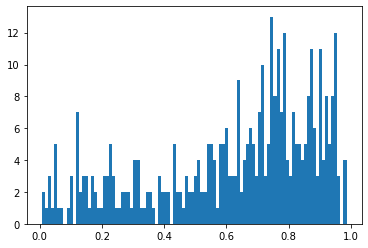

In [29]:
plt.hist(pred_test, bins = 100)

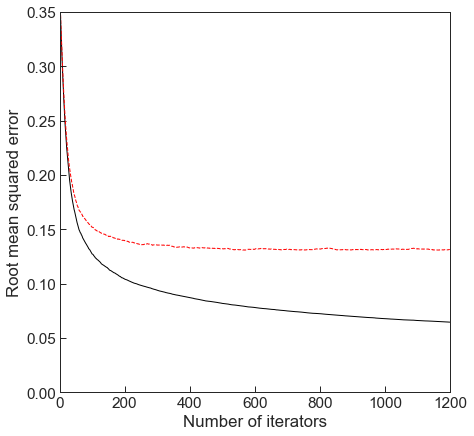

savefig() got unexpected keyword argument "bbox_i6nches" which is no longer supported as of 3.3 and will become an error in 3.6
meta NOT subset; don't know how to subset; dropped


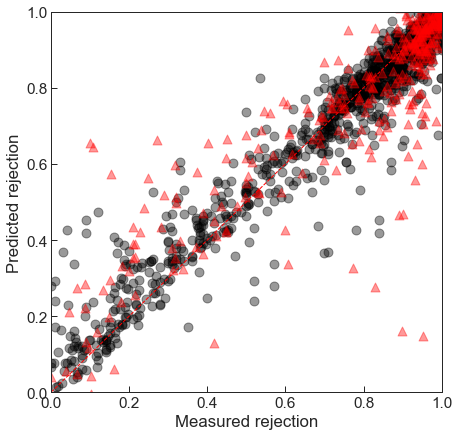

meta NOT subset; don't know how to subset; dropped


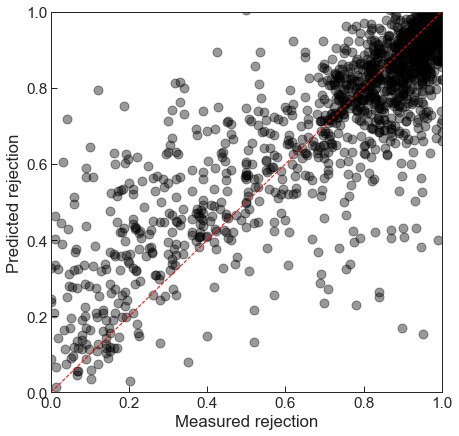

meta NOT subset; don't know how to subset; dropped


In [23]:
fig = plt.figure(figsize=(7,7))
#plt.title('Learning curve_rmse')
plt.plot(results['validation_0']['rmse'], 'k-') #train
plt.plot(results['validation_1']['rmse'], 'r--') #test
plt.xlabel('Number of iterators')
plt.ylabel('Root mean squared error')
plt.xlim(0, 1200)
plt.ylim(0, 0.35)
plt.xticks(np.arange(0,1201,200))
plt.show()
fig.savefig("fig_0_path_3_fin_b2.pdf", bbox_i6nches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))
plt.scatter(y_train, y_pred_train_best, c='k', alpha=0.4, s=80, edgecolors=None)
plt.scatter(y_test, y_pred_test_best, c='r', marker='^', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.0, 0.1), np.arange(0, 1.0, 0.1), 'r--')
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_1_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

fig = plt.figure(figsize=(7,7))        
plt.scatter(y_data_scaled, old, c='k', alpha=0.4, s=80, edgecolors=None)
plt.plot(np.arange(0, 1.01, 0.1), np.arange(0, 1.01, 0.1), 'r--')
#plt.plot([y_data_scaled.min(), y_data_scaled.max()], [y_data_scaled.min(), y_data_scaled.max()], 'k--', lw=2)
plt.xlabel('Measured rejection')
plt.ylabel('Predicted rejection')
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
fig.savefig("fig_2_path_3_fin_b2.pdf", bbox_inches='tight', transparent=True)

# fig = plt.figure(figsize=(7,7))
# plt.scatter(y_pred_test_best, y_test - y_pred_test_best)
# plt.show()

In [ ]:
# save the model
filename = 'Model_RDkit_2048.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [81]:
# save the model
filename = 'Model_RDkit_2048_short_2.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_Morgan_2048_6.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [60]:
# save the model
filename = 'Model_Morgan_2048_6_morgan.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [16]:
# save the model
filename = 'Model_PubChem_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [49]:
# save the model
filename = 'Model_MACCS.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

In [52]:
# save the model
filename = 'Model_MACCS_short.sav'
pickle.dump(model_B_best, open(filename, 'wb'))

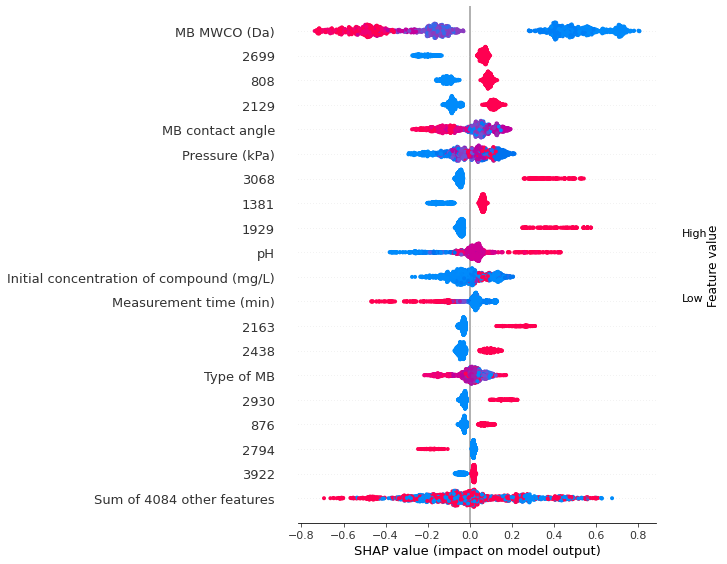

In [25]:
#explainer = shap.Explainer(model_B_best)
explainer = shap.Explainer(model)
shap_values = explainer(x_train, check_additivity=False)
#shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.max(0), show=False)#, color=plt.get_cmap("cool"))
shap.plots.beeswarm(shap_values, max_display=20, order=shap_values.abs.mean(0), show=False)#, color=plt.get_cmap("cool"))
#shap.summary_plot(shap_values, x_train)
#plt.savefig("shap_path_3_fin_b2.pdf", format='pdf', dpi=1000, bbox_inches='tight')
#plt.savefig("shap_morgan.png", format='png', dpi=1000, bbox_inches='tight')

In [49]:
shap.initjs()

In [76]:
shap_values_2 = explainer.shap_values(x_train)
shap.force_plot(explainer.expected_value, shap_values_2[0:5,:], x_train.iloc[0:5,:])

Exception: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.041591, while the model output was 0.320452. If this difference is acceptable you can set check_additivity=False to disable this check.

meta NOT subset; don't know how to subset; dropped


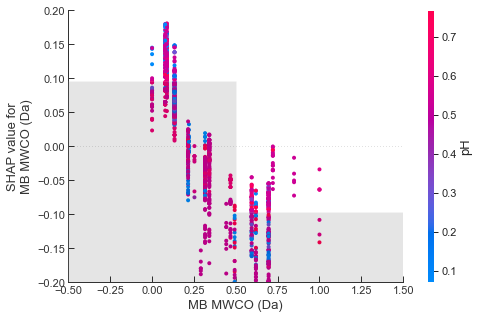

In [21]:
# https://shap.readthedocs.io/en/latest/example_notebooks/api_examples/plots/scatter.html
shap.plots.scatter(shap_values[:,"MB MWCO (Da)"], color=shap_values[:,"pH"], xmin=0, xmax=1.25, ymin=-0.2, ymax=0.2, show=False) #cmap=plt.get_cmap("cool")
plt.savefig("shap_dependence_morgan_2_short.pdf", format='pdf', dpi=1000, bbox_inches='tight')

In [180]:
np.sum(shap_values.abs.max(0).values[3:23])/20

0.0038596674799919128

In [15]:
#https://machinelearningmastery.com/save-load-machine-learning-models-python-scikit-learn/
# load the model
loaded_model = pickle.load(open('Model_RDkit_2048_short_2.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.6953144634628119
